# Table of Contents

1. Import the Libraries
2. Data Preparation
3. Exploratory Data Analysis
    3.a. Univariate Analysis
    3.b. Bivariate Analysis
    3.c. Multivariate Analysis
4. Base Model
5. Feature Engineering and Feature Extraction
6. Comparison of Models and Selction of Model
        6.a. MLR Full Model                                                                                      
        6.b. MLR Model with FWD
        6.c. Model with Gradient Descent
        6.d. Ridge Regularization
        6.e. Lasso Regularization
        6.f. ElasticNet Regularization
        6.g. Decision Tree
        6.h. Random Forest
        6.i. AdaBoost
        6.j. XGBoost
        6.k. Stack Generalization

# Import the Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import statistics to perform statistical computations
import statistics

# to test the normality 
from scipy.stats import shapiro

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 
import scikit_posthocs

# Data Preparation

In [4]:
df = pd.read_csv('Final_Dataset.csv')

In [5]:
df1 = df.copy()

In [6]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [7]:
df1.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [572]:
df.shape

(986, 11)

In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [574]:
df.dtypes

Age                        int64
Diabetes                   int64
BloodPressureProblems      int64
AnyTransplants             int64
AnyChronicDiseases         int64
Height                     int64
Weight                     int64
KnownAllergies             int64
HistoryOfCancerInFamily    int64
NumberOfMajorSurgeries     int64
PremiumPrice               int64
dtype: object

In [575]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

# Exploratory Data Analysis

## Univariate Analysis

### Age

In [576]:
df['Age'].describe()

count   986.000000
mean     41.745436
std      13.963371
min      18.000000
25%      30.000000
50%      42.000000
75%      53.000000
max      66.000000
Name: Age, dtype: float64

In [577]:
# The max age is 66 and min age is 18
# Mean age is 41.75 years

<AxesSubplot:xlabel='Age', ylabel='Density'>

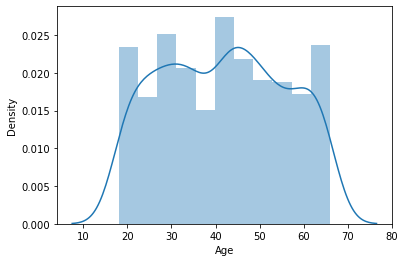

In [578]:
sns.distplot(df['Age'])

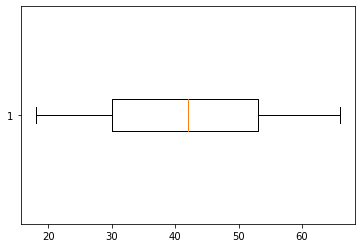

In [579]:
plt.boxplot(df['Age'],vert=False)
plt.show()

### Diabetes

In [580]:
df['Diabetes'].value_counts()

0    572
1    414
Name: Diabetes, dtype: int64

In [581]:
df['Diabetes'].value_counts(1)*100

0   58.012170
1   41.987830
Name: Diabetes, dtype: float64

In [582]:
# Assuming 0 is for Non_Diabetic and 1 is for Diabetic

In [583]:
#There are more diabetic people than non-diabetic. 
# Having - 414, Not Having - 572

In [584]:
# 58.01% of the people are non diabetic and 41.98% are diabetic

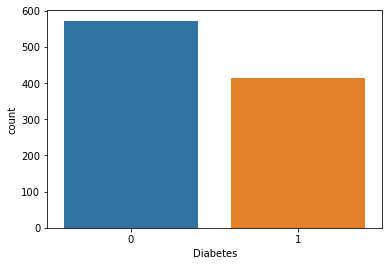

In [585]:
sns.countplot(df['Diabetes'])
plt.show()

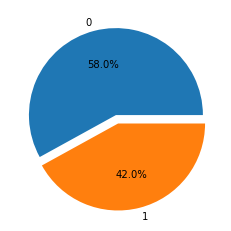

In [586]:
plt.pie(df['Diabetes'].value_counts(),explode = [0,0.1],autopct='%0.1f%%',labels = [0,1])
plt.show()

### Blood Pressure Problems

In [587]:
df['BloodPressureProblems'].value_counts()

0    524
1    462
Name: BloodPressureProblems, dtype: int64

In [588]:
df['BloodPressureProblems'].value_counts(1)*100

0   53.144016
1   46.855984
Name: BloodPressureProblems, dtype: float64

In [589]:
# Assuming 0 is for no blood pressure problems and 1 is for having blood pressure problems

In [590]:
# There are more people with no blood pressure problems.
# Having - 462, Not Having - 524

In [591]:
# 53.14% of the people have no blood pressure problems and 46.85% of people have blood pressure problems

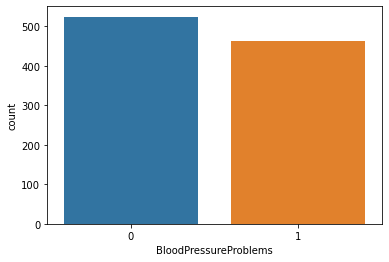

In [592]:
sns.countplot(df['BloodPressureProblems'])
plt.show()

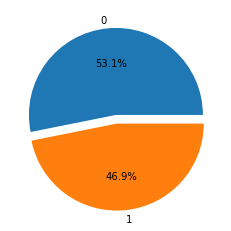

In [593]:
plt.pie(df['BloodPressureProblems'].value_counts(),explode = [0,0.1],autopct='%0.1f%%',labels = [0,1])
plt.show()

### Transplants

In [594]:
df['AnyTransplants'].value_counts()

0    931
1     55
Name: AnyTransplants, dtype: int64

In [595]:
df['AnyTransplants'].value_counts(1)*100

0   94.421907
1    5.578093
Name: AnyTransplants, dtype: float64

In [596]:
# Assuming 0 for No and 1 for Yes

In [597]:
# There are only few people who had transplants
# Yes - 55, No - 931

In [598]:
# 94.42% of the people did not had any transplants and only 5.57% of the people had transplants

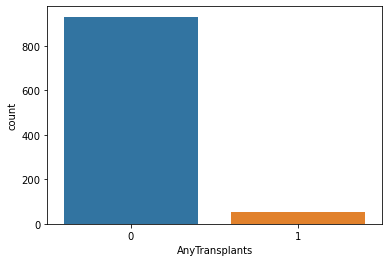

In [599]:
sns.countplot(df['AnyTransplants'])
plt.show()

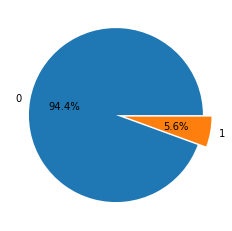

In [600]:
plt.pie(df['AnyTransplants'].value_counts(),explode = [0,0.1],autopct='%0.1f%%',labels = [0,1])
plt.show()

### Chronic Diseases

In [601]:
df['AnyChronicDiseases'].value_counts()

0    808
1    178
Name: AnyChronicDiseases, dtype: int64

In [602]:
df['AnyChronicDiseases'].value_counts(1)*100

0   81.947262
1   18.052738
Name: AnyChronicDiseases, dtype: float64

In [603]:
# Assuming 0 for no chronic diseases and 1 for having chronic diseases

In [604]:
# There are more people who do not have any chronic diseases
# Having - 178, Not Having - 808

In [605]:
# 81.94% of them do not have any chronic diseases and only 18% of them have chronic diseases

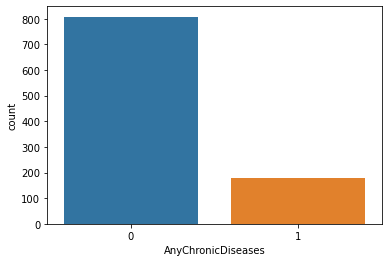

In [606]:
sns.countplot(df['AnyChronicDiseases'])
plt.show()

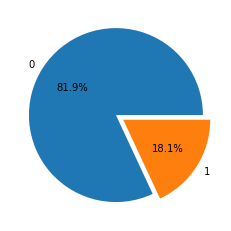

In [607]:
plt.pie(df['AnyChronicDiseases'].value_counts(),explode = [0,0.1],autopct='%0.1f%%',labels = [0,1])
plt.show()

### Height

In [608]:
df['Height'].describe()

count   986.000000
mean    168.182556
std      10.098155
min     145.000000
25%     161.000000
50%     168.000000
75%     176.000000
max     188.000000
Name: Height, dtype: float64

In [609]:
# The min height is 145 and max is 188
# Mean height is 168

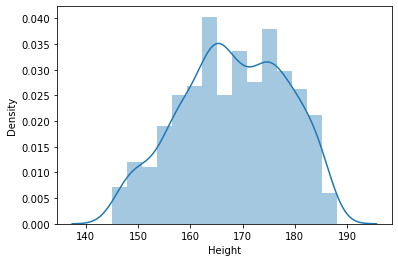

In [610]:
sns.distplot(df['Height'])
plt.show()

<AxesSubplot:xlabel='Height'>

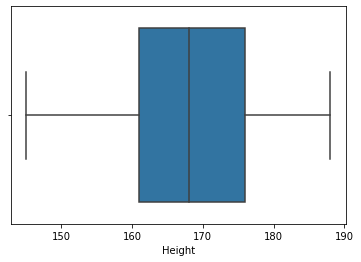

In [611]:
sns.boxplot(df.Height)

### Weight

In [612]:
df['Weight'].describe()

count   986.000000
mean     76.950304
std      14.265096
min      51.000000
25%      67.000000
50%      75.000000
75%      87.000000
max     132.000000
Name: Weight, dtype: float64

In [613]:
# min weight is 51 and max weight is 132
# Mean Weight is 76.95 andMEdian Weight is 75

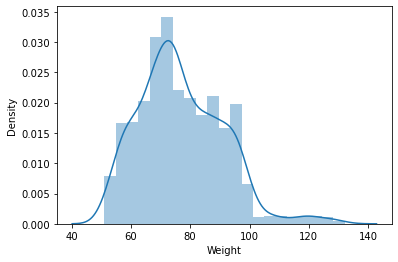

In [614]:
sns.distplot(df['Weight'])
plt.show()

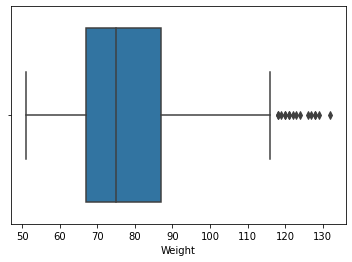

In [615]:
sns.boxplot(df['Weight'])
plt.show()

### BMI

In [616]:
bmi = df['Weight']/((df['Height']/100)**2)
bmi

0     23.725286
1     22.530864
2     23.634033
3     27.770313
4     31.934969
5     26.953125
6     24.000000
7     24.114038
8     25.909457
9     28.076319
10    24.163265
11    19.366401
12    17.990153
13    28.650756
14    33.777778
15    26.562500
16    30.178821
17    34.575814
18    25.065746
19    28.037923
20    37.890625
21    24.724520
22    34.626821
23    27.102041
24    42.541994
25    19.267171
26    42.541994
27    38.594798
28    27.815882
29    24.776795
30    34.013605
31    39.387119
32    27.239224
33    37.105751
34    28.731747
35    30.477219
36    22.313278
37    28.228979
38    27.064052
39    32.242063
40    25.593737
41    29.961612
42    16.245274
43    25.029761
44    20.936639
45    24.618104
46    21.534908
47    31.708284
48    23.011177
49    32.421875
50    31.626276
51    29.705644
52    16.946676
53    30.759870
54    21.671258
55    24.609375
56    23.939481
57    21.936347
58    32.462196
59    21.977351
60    29.515939
61    27.848795
62    28

In [617]:
bmi.describe()

count   986.000000
mean     27.460709
std       5.878671
min      15.156281
25%      23.393392
50%      27.156602
75%      30.759870
max      50.000000
dtype: float64

In [618]:
# Min bmi is 15.15 and max is 50 
# Mean is 27.46 and Median is 27.15

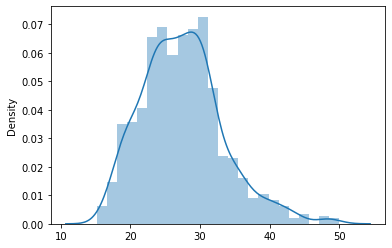

In [619]:
sns.distplot(bmi)
plt.show()

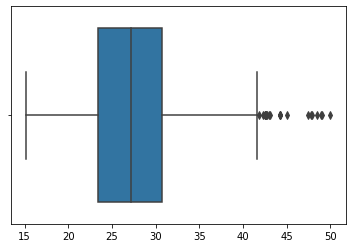

In [620]:
sns.boxplot(bmi)
plt.show()

### KnownAllergies             


In [621]:
df['KnownAllergies'].value_counts()

0    774
1    212
Name: KnownAllergies, dtype: int64

In [622]:
df['KnownAllergies'].value_counts(1)*100

0   78.498986
1   21.501014
Name: KnownAllergies, dtype: float64

In [623]:
# Assuming 0 to be having known allergies and 1 to be not having any known allergies

In [624]:
# There are 774 people with no known allergies and 212 people with known allergies
# 78% - No Known Allergies and 21.5% Having known allergies

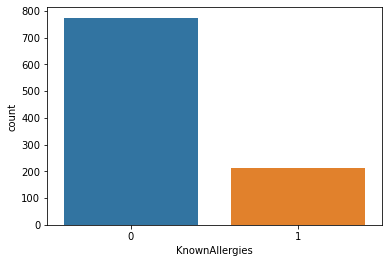

In [625]:
sns.countplot(df['KnownAllergies'])
plt.show()

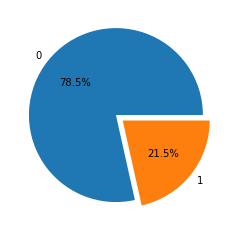

In [626]:
plt.pie(df['KnownAllergies'].value_counts(),explode = [0,0.1],autopct='%0.1f%%',labels = [0,1])
plt.show()

### HistoryOfCancerInFamily    


In [627]:
df['HistoryOfCancerInFamily'].value_counts()

0    870
1    116
Name: HistoryOfCancerInFamily, dtype: int64

In [628]:
df['HistoryOfCancerInFamily'].value_counts(1)*100

0   88.235294
1   11.764706
Name: HistoryOfCancerInFamily, dtype: float64

In [629]:
# Assuming 0 for not having any cancer history in family and 1 for having 

In [630]:
# There are 870 people without any cancer history and 116 with cancer history
# 88.23% - No Cancer History and 11.76% with Cancer History

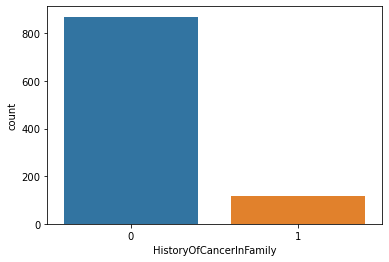

In [631]:
sns.countplot(df['HistoryOfCancerInFamily'])
plt.show()

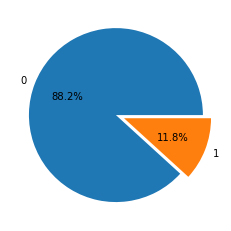

In [632]:
plt.pie(df['HistoryOfCancerInFamily'].value_counts(),explode = [0,0.1],autopct='%0.1f%%',labels = [0,1])
plt.show()

### NumberOfMajorSurgeries

In [633]:
df['NumberOfMajorSurgeries'].value_counts()

0    479
1    372
2    119
3     16
Name: NumberOfMajorSurgeries, dtype: int64

In [634]:
df['NumberOfMajorSurgeries'].value_counts(1)*100

0   48.580122
1   37.728195
2   12.068966
3    1.622718
Name: NumberOfMajorSurgeries, dtype: float64

In [635]:
# People with no major surgeries are - 479 - 48.5%
# People with one major surgery are - 372 - 37.72%
# People with 2 major surgeries - 119 - 12.06%
# People with 3 major surgeries - 16 - 1.62%

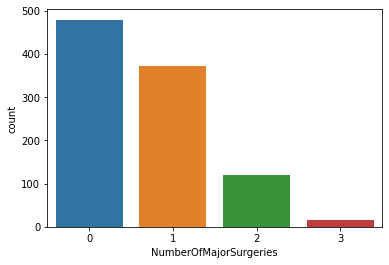

In [636]:
sns.countplot(df['NumberOfMajorSurgeries'])
plt.show()

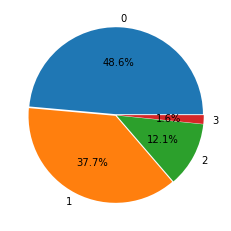

In [637]:
plt.pie(df['NumberOfMajorSurgeries'].value_counts(),explode=[0.01,0.01,0.01,0.01],autopct='%0.1f%%',labels = [0,1,2,3])
plt.show()

## Bivariate Analysis

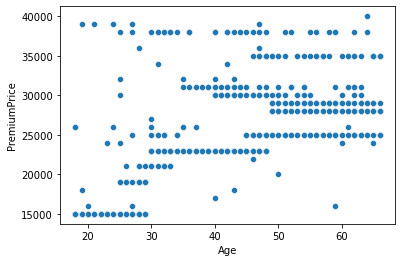

In [638]:
sns.scatterplot(data=df,x='Age',y='PremiumPrice')
plt.show()

<AxesSubplot:xlabel='Age'>

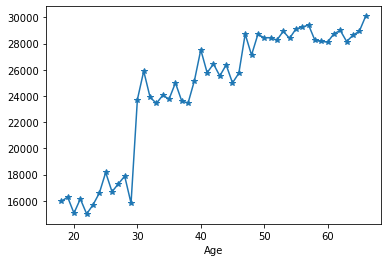

In [639]:
df.groupby('Age')['PremiumPrice'].mean().plot(kind='line',marker='*')

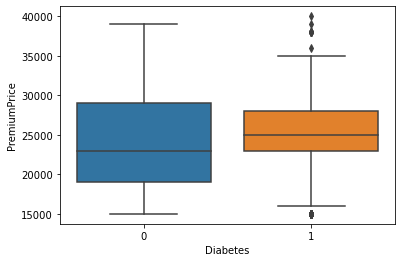

In [640]:
sns.boxplot(data=df,x='Diabetes',y='PremiumPrice')
plt.show()

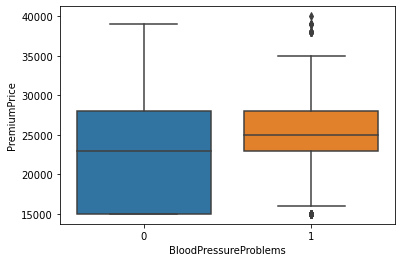

In [641]:
sns.boxplot(data=df,x='BloodPressureProblems',y='PremiumPrice')
plt.show()

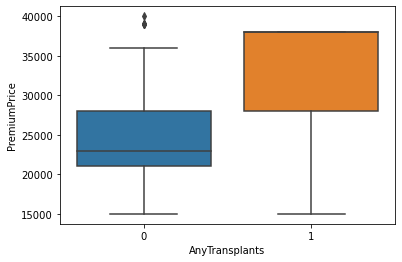

In [642]:
sns.boxplot(data=df,x='AnyTransplants',y='PremiumPrice')
plt.show()

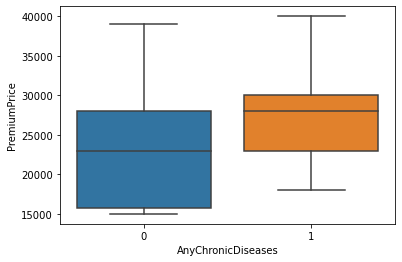

In [643]:
sns.boxplot(data=df,x='AnyChronicDiseases',y='PremiumPrice')
plt.show()

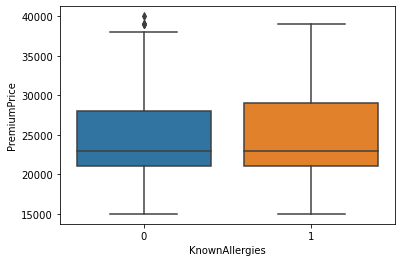

In [644]:
sns.boxplot(data=df,x='KnownAllergies',y='PremiumPrice')
plt.show()

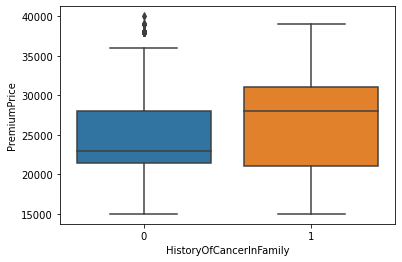

In [645]:
sns.boxplot(data=df,x='HistoryOfCancerInFamily',y='PremiumPrice')
plt.show()

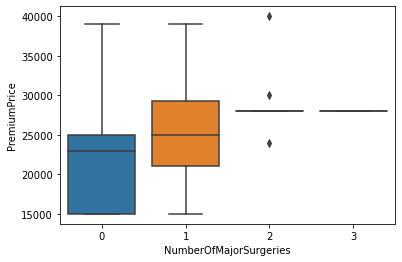

In [646]:
sns.boxplot(data=df,x='NumberOfMajorSurgeries',y='PremiumPrice')
plt.show()

In [647]:
df['bmi']= (df['Weight']/(df['Height']**2))*10000
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,bmi
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969


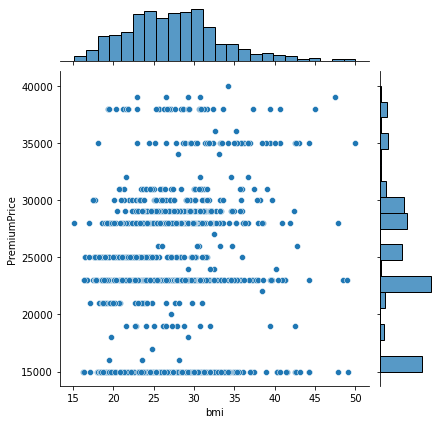

In [648]:
sns.jointplot(data=df,x='bmi',y='PremiumPrice')
plt.show()

## Multivariate Analysis

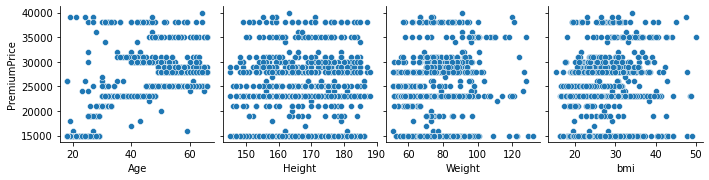

In [649]:
pp = sns.pairplot(data=df,
                  y_vars=['PremiumPrice'],
                  x_vars=['Age', 'Height','Weight','bmi'])
plt.show()

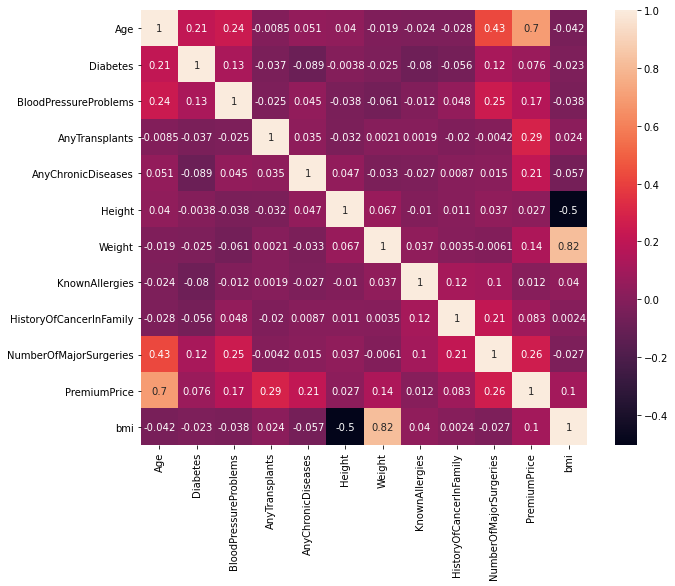

In [650]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [651]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'bmi'],
      dtype='object')

# Base Model

In [652]:
s=df.copy()

In [653]:
s.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'bmi'],
      dtype='object')

In [654]:
s.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,bmi
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969


In [655]:
s.Diabetes=s.Diabetes.astype('object')
s.BloodPressureProblems=s.BloodPressureProblems.astype('object')
s.AnyChronicDiseases=s.AnyChronicDiseases.astype('object')
s.AnyTransplants=s.AnyTransplants.astype('object')
s.KnownAllergies=s.KnownAllergies.astype('object')
s.HistoryOfCancerInFamily=s.HistoryOfCancerInFamily.astype('object')
s.NumberOfMajorSurgeries=s.NumberOfMajorSurgeries.astype('object')

In [656]:
snum=s.select_dtypes(include=np.number)

In [657]:
scat=s.select_dtypes(include=np.object)

In [658]:
snum.columns

Index(['Age', 'Height', 'Weight', 'PremiumPrice', 'bmi'], dtype='object')

In [659]:
snum.head()

,Age,Height,Weight,PremiumPrice,bmi
0,45,155,57,25000,23.725286
1,60,180,73,29000,22.530864
2,36,158,59,23000,23.634033
3,52,183,93,28000,27.770313
4,38,166,88,23000,31.934969


In [660]:
s1=np.log(snum)

In [661]:
s1.head()

,Age,Height,Weight,PremiumPrice,bmi
0,3.806662,5.043425,4.043051,10.126631,3.166541
1,4.094345,5.192957,4.290459,10.275051,3.114886
2,3.583519,5.062595,4.077537,10.043249,3.162688
3,3.951244,5.209486,4.532599,10.239960,3.323968
4,3.637586,5.111988,4.477337,10.043249,3.463702


<AxesSubplot:xlabel='Weight'>

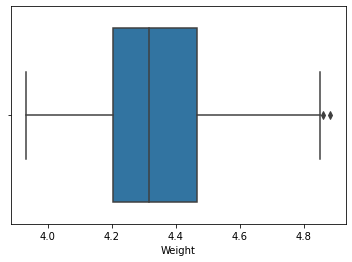

In [662]:
sns.boxplot(s1.Weight)

<AxesSubplot:xlabel='Height'>

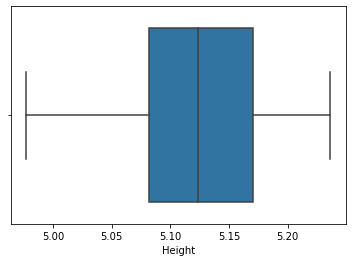

In [663]:
sns.boxplot(s1.Height)

<AxesSubplot:xlabel='bmi'>

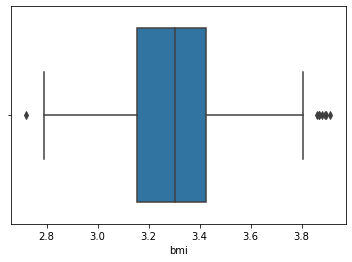

In [664]:
sns.boxplot(s1.bmi)

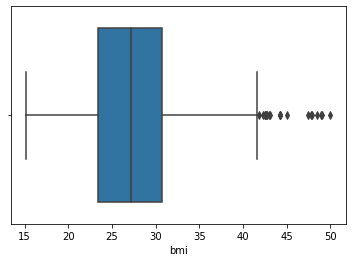

In [665]:
sns.boxplot(df.bmi)
plt.show()

<AxesSubplot:xlabel='PremiumPrice'>

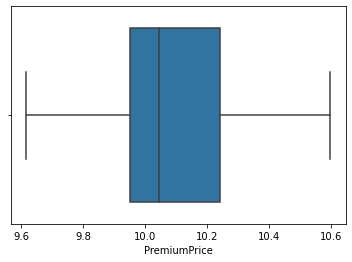

In [666]:
sns.boxplot(s1.PremiumPrice)

-0.4574898246226816

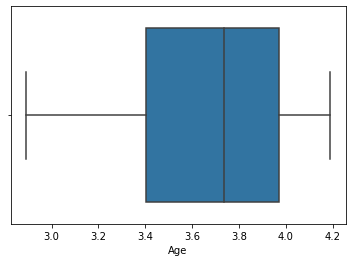

In [667]:
sns.boxplot(s1.Age)
s1.Age.skew()

In [668]:
scat=scat.astype('int')

In [669]:
scat.dtypes

Diabetes                   int32
BloodPressureProblems      int32
AnyTransplants             int32
AnyChronicDiseases         int32
KnownAllergies             int32
HistoryOfCancerInFamily    int32
NumberOfMajorSurgeries     int32
dtype: object

In [670]:
s_updated=pd.concat([scat,s1],axis=1)

In [671]:
s_updated.head()

,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Age,Height,Weight,PremiumPrice,bmi
0,0,0,0,0,0,0,0,3.806662,5.043425,4.043051,10.126631,3.166541
1,1,0,0,0,0,0,0,4.094345,5.192957,4.290459,10.275051,3.114886
2,1,1,0,0,0,0,1,3.583519,5.062595,4.077537,10.043249,3.162688
3,1,1,0,1,0,0,2,3.951244,5.209486,4.532599,10.239960,3.323968
4,0,0,0,1,0,0,1,3.637586,5.111988,4.477337,10.043249,3.463702


In [672]:
x=s_updated.drop('PremiumPrice',axis=1)
y=s_updated.PremiumPrice
sc=sm.add_constant(x)
full=sm.OLS(y,x).fit()
full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PremiumPrice   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     234.2
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          3.43e-251
Time:                        20:55:24   Log-Likelihood:                 492.01
No. Observations:                 986   AIC:                            -962.0
Df Residuals:                     975   BIC:                            -908.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Diabetes                   -0.0199      0.010     -2.011      0.045      -0.039      -0.000
BloodPressureProblems       0.0101      0.010      1.020      0.308      -0.009       0.030
AnyTransplants              0.2588      0.021     12.597      0.000       0.219       0.299
AnyChronicDiseases          0.1034      0.012      8.351      0.000       0.079       0.128
KnownAllergies              0.0096      0.012      0.824      0.410      -0.013       0.032
HistoryOfCancerInFamily     0.0821      0.015      5.417      0.000       0.052       0.112
NumberOfMajorSurgeries     -0.0206      0.007     -2.864      0.004      -0.035      -0.006
Age                         0.5927      0.015     40.803      0.000       0.564       0.621
Height                      1.5235      0.028     54.771      0.000       1.469       1.578
Weight                     -0.5867      0.056    -10.447      0.000      -0.697      -0.477
bmi                         0.7888      0.045     17.697      0.000       0.701       0.876
==============================================================================
Omnibus:                      249.556   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1623.074
Skew:                           0.991   Prob(JB):                         0.00
Kurtosis:                       8.965   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [673]:
from sklearn.model_selection import train_test_split

In [674]:
x=s_updated[['Age','bmi']]
y=s_updated.PremiumPrice

In [675]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=100)

In [676]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((788, 2), (198, 2), (788,), (198,))

In [677]:
xc=sm.add_constant(xtrain)
model=sm.OLS(ytrain,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PremiumPrice   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     615.1
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          1.94e-161
Time:                        20:55:24   Log-Likelihood:                 281.76
No. Observations:                 788   AIC:                            -557.5
Df Residuals:                     785   BIC:                            -543.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4748      0.117     64.034      0.000       7.246       7.704
Age            0.5789      0.017     34.976      0.000       0.546       0.611
bmi            0.1419      0.029      4.878      0.000       0.085       0.199
==============================================================================
Omnibus:                      242.959   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              859.164
Skew:                           1.445   Prob(JB):                    2.72e-187
Kurtosis:                       7.221   Cond. No.                         99.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

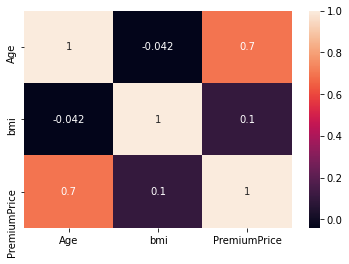

In [678]:
sns.heatmap(s[['Age','bmi','PremiumPrice']].corr(),annot=True)
plt.show()

In [679]:
x=s_updated[['Age','Height','Weight']]
y=s_updated.PremiumPrice
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=100)

In [680]:
xc=sm.add_constant(xtrain)
model2=sm.OLS(ytrain,xc).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PremiumPrice   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     415.4
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          1.86e-161
Time:                        20:55:24   Log-Likelihood:                 285.15
No. Observations:                 788   AIC:                            -562.3
Df Residuals:                     784   BIC:                            -543.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5097      0.520     14.451      0.000       6.490       8.530
Age            0.5767      0.017     34.933      0.000       0.544       0.609
Height        -0.0728      0.100     -0.732      0.465      -0.268       0.123
Weight         0.1879      0.034      5.537      0.000       0.121       0.254
==============================================================================
Omnibus:                      249.000   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              916.535
Skew:                           1.468   Prob(JB):                    9.48e-200
Kurtosis:                       7.393   Cond. No.                         677.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

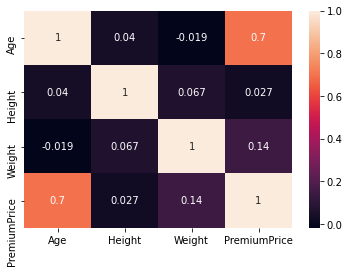

In [681]:
sns.heatmap(s[['Age','Height','Weight','PremiumPrice']].corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='Weight'>

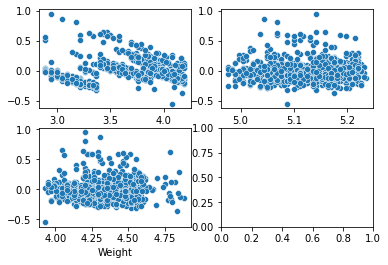

In [682]:
fig,ax=plt.subplots(2,2)
sns.scatterplot(xtrain.Age,model2.resid,ax=ax[0,0])
sns.scatterplot(xtrain.Height,model2.resid,ax=ax[0,1])
sns.scatterplot(xtrain.Weight,model2.resid,ax=ax[1,0])

In [683]:
import statsmodels.stats.api as sms

In [684]:
test=sms.het_breuschpagan(model2.resid,model2.model.exog)
test[2:]
#fvalue=8.34, pvalue=1.830

(8.340442710362645, 1.830867619403423e-05)

In [685]:
from statsmodels.graphics.gofplots import qqplot

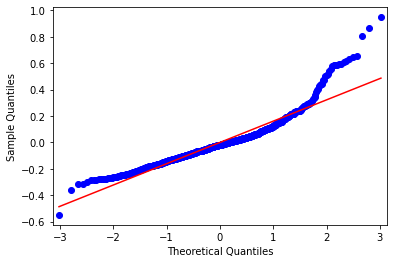

In [686]:
qqplot(model2.resid,line='r')
plt.show()

In [687]:
from scipy.stats import shapiro
shapiro(model2.resid)

ShapiroResult(statistic=0.9056015610694885, pvalue=1.1675404939922191e-21)

In [688]:
# From model we can see that age has the most positive impact 
# Height has the least impact 
# The Durbis watson number is close to 2 indicating no auto correlation
# Condition Number(CN) is less than 1000 which means there is no multicollinearity
# No particular patern has been seen implies there is linearity present in the data
# from breuschpagan test we can see that pvalue>0.05 There is no heteroscedasticity present in the data ie the residuals have equal variance
# from qqplot and shapiro we can see that the residuals not follow normal
# The rsquared value is 0.614.Thus, we conclude that the 61.4% variation in the PremiumPrice is explained by the model.

In [689]:
s_updated.head()

,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Age,Height,Weight,PremiumPrice,bmi
0,0,0,0,0,0,0,0,3.806662,5.043425,4.043051,10.126631,3.166541
1,1,0,0,0,0,0,0,4.094345,5.192957,4.290459,10.275051,3.114886
2,1,1,0,0,0,0,1,3.583519,5.062595,4.077537,10.043249,3.162688
3,1,1,0,1,0,0,2,3.951244,5.209486,4.532599,10.239960,3.323968
4,0,0,0,1,0,0,1,3.637586,5.111988,4.477337,10.043249,3.463702


In [690]:
s.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,bmi
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969


In [691]:
t=s[['Age','Height','Weight']]
df_target=s.PremiumPrice

In [692]:
t.head()

,Age,Height,Weight
0,45,155,57
1,60,180,73
2,36,158,59
3,52,183,93
4,38,166,88


In [693]:
t.skew()

Age       0.029895
Height   -0.179788
Weight    0.666726
dtype: float64

In [694]:
t.describe()

,Age,Height,Weight
count,986.000000,986.000000,986.000000
mean,41.745436,168.182556,76.950304
std,13.963371,10.098155,14.265096
min,18.000000,145.000000,51.000000
25%,30.000000,161.000000,67.000000
50%,42.000000,168.000000,75.000000
75%,53.000000,176.000000,87.000000
max,66.000000,188.000000,132.000000


In [695]:
from sklearn.preprocessing import StandardScaler

In [696]:
sc=StandardScaler()
t=pd.DataFrame(sc.fit_transform(t),columns=t.columns)
t.head()

,Age,Height,Weight
0,0.233197,-1.306105,-1.399250
1,1.307981,1.170852,-0.277062
2,-0.411674,-1.008870,-1.258976
3,0.734763,1.468086,1.125674
4,-0.268369,-0.216244,0.774990


In [697]:
t.describe()

,Age,Height,Weight
count,986.000000,986.000000,986.000000
mean,0.000000,0.000000,0.000000
std,1.000507,1.000507,1.000507
min,-1.701415,-2.296887,-1.820070
25%,-0.841587,-0.711635,-0.697882
50%,0.018240,-0.018087,-0.136788
75%,0.806415,0.774539,0.704853
max,1.737895,1.963478,3.861007


In [698]:
t.skew()

Age       0.029895
Height   -0.179788
Weight    0.666726
dtype: float64

In [699]:
y=df_target 

In [700]:
y=(y-y.mean())/y.std()

In [701]:
y.describe()

count   986.000000
mean     -0.000000
std       1.000000
min      -1.494308
25%      -0.534029
50%      -0.213936
75%       0.586296
max       2.506854
Name: PremiumPrice, dtype: float64

In [702]:
y.skew()

0.09763944413484106

<AxesSubplot:>

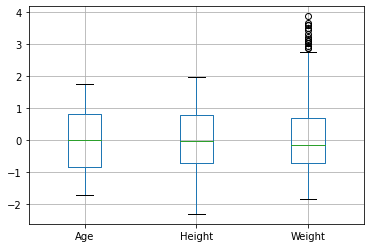

In [703]:
t.boxplot()

<AxesSubplot:xlabel='PremiumPrice'>

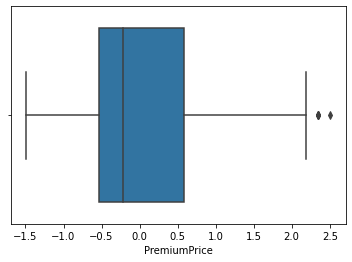

In [704]:
sns.boxplot(y)

In [705]:
scat.columns

Index(['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily',
       'NumberOfMajorSurgeries'],
      dtype='object')

In [706]:
df=pd.concat([t,scat,y],axis=1)

In [707]:
df.shape

(986, 11)

In [708]:
df.head()

,Age,Height,Weight,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,0.233197,-1.306105,-1.399250,0,0,0,0,0,0,0,0.106157
1,1.307981,1.170852,-0.277062,1,0,0,0,0,0,0,0.746343
2,-0.411674,-1.008870,-1.258976,1,1,0,0,0,0,1,-0.213936
3,0.734763,1.468086,1.125674,1,1,0,1,0,0,2,0.586296
4,-0.268369,-0.216244,0.774990,0,0,0,1,0,0,1,-0.213936


In [709]:
df[['Weight','PremiumPrice']][(df.Weight>3)].index

Int64Index([158, 186, 192, 195, 196, 203, 204, 207, 217, 218, 225, 227, 228], dtype='int64')

In [710]:
df=df.drop([158, 186, 192, 195, 196, 203, 204, 207, 217, 218, 225, 227, 228],axis=0)

In [711]:
df.shape

(973, 11)

<AxesSubplot:>

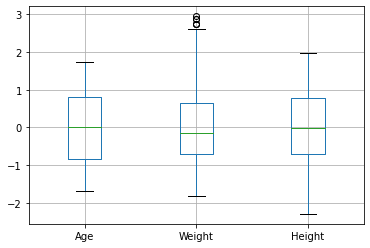

In [712]:
df[['Age','Weight','Height']].boxplot()

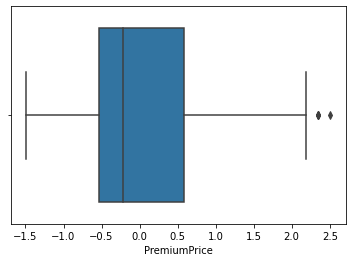

In [713]:
sns.boxplot(df.PremiumPrice)
plt.show()

In [714]:
df=df.reset_index(drop=True)

In [715]:
df.head()

,Age,Height,Weight,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,0.233197,-1.306105,-1.399250,0,0,0,0,0,0,0,0.106157
1,1.307981,1.170852,-0.277062,1,0,0,0,0,0,0,0.746343
2,-0.411674,-1.008870,-1.258976,1,1,0,0,0,0,1,-0.213936
3,0.734763,1.468086,1.125674,1,1,0,1,0,0,2,0.586296
4,-0.268369,-0.216244,0.774990,0,0,0,1,0,0,1,-0.213936


In [716]:
y=df.PremiumPrice

In [717]:
x=df.drop('PremiumPrice',axis=1)

In [718]:
x.head()

,Age,Height,Weight,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,0.233197,-1.306105,-1.399250,0,0,0,0,0,0,0
1,1.307981,1.170852,-0.277062,1,0,0,0,0,0,0
2,-0.411674,-1.008870,-1.258976,1,1,0,0,0,0,1
3,0.734763,1.468086,1.125674,1,1,0,1,0,0,2
4,-0.268369,-0.216244,0.774990,0,0,0,1,0,0,1


In [719]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((681, 10), (292, 10), (681,), (292,))

In [720]:
X_train=sm.add_constant(x_train)
Full_model=sm.OLS(y_train,X_train).fit()
Full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PremiumPrice   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     115.0
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          3.86e-138
Time:                        20:55:27   Log-Likelihood:                -637.49
No. Observations:                 681   AIC:                             1297.
Df Residuals:                     670   BIC:                             1347.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0894      0.046     -1.934      0.054      -0.180       0.001
Age                         0.7301      0.027     26.787      0.000       0.677       0.784
Height                     -0.0231      0.024     -0.977      0.329      -0.070       0.023
Weight                      0.1978      0.026      7.732      0.000       0.148       0.248
Diabetes                   -0.0732      0.050     -1.463      0.144      -0.172       0.025
BloodPressureProblems       0.0197      0.050      0.392      0.695      -0.079       0.119
AnyTransplants              1.3575      0.104     13.053      0.000       1.153       1.562
AnyChronicDiseases          0.3874      0.063      6.196      0.000       0.265       0.510
KnownAllergies              0.0576      0.059      0.972      0.331      -0.059       0.174
HistoryOfCancerInFamily     0.3316      0.076      4.381      0.000       0.183       0.480
NumberOfMajorSurgeries     -0.0952      0.037     -2.593      0.010      -0.167      -0.023
==============================================================================
Omnibus:                      190.186   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1088.551
Skew:                           1.121   Prob(JB):                    4.21e-237
Kurtosis:                       8.774   Cond. No.                         6.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [721]:
Full_model.rsquared

0.6317749281852185

In [722]:
Full_model.rsquared_adj

0.6262790315909681

In [723]:
Full_model.condition_number

6.534120625373751

In [724]:
y_pred_train=Full_model.predict(X_train)
X_test=sm.add_constant(x_test)
y_pred_test=Full_model.predict(X_test)

In [725]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [726]:
#MSE
mean_squared_error(y_train,y_pred_train),mean_squared_error(y_test,y_pred_test)

(0.3807275343067553, 0.27900189383294144)

In [727]:
#RMSE
np.sqrt(mean_squared_error(y_train,y_pred_train)),np.sqrt(mean_squared_error(y_test,y_pred_test))

(0.6170312263627793, 0.5282062985547801)

In [728]:
#MAE
mean_absolute_error(y_train,y_pred_train),mean_absolute_error(y_test,y_pred_test)

(0.43980517282337234, 0.3903041123781479)

In [729]:
#MAPE
mean_absolute_percentage_error(y_train,y_pred_train),mean_absolute_percentage_error(y_test,y_pred_test)

(1.0050378194791911, 1.0951392219688192)

In [730]:
x.head()

,Age,Height,Weight,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,0.233197,-1.306105,-1.399250,0,0,0,0,0,0,0
1,1.307981,1.170852,-0.277062,1,0,0,0,0,0,0
2,-0.411674,-1.008870,-1.258976,1,1,0,0,0,0,1
3,0.734763,1.468086,1.125674,1,1,0,1,0,0,2
4,-0.268369,-0.216244,0.774990,0,0,0,1,0,0,1


In [731]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=10)

In [732]:
linreg = LinearRegression()
linreg_forward = sfs(estimator=linreg,k_features=(2,7),forward=True,
                     verbose=2, scoring='r2')
sfs_forward = linreg_forward.fit(xtrain, ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-02-04 20:55:27] Features: 1/7 -- score: 0.47928975982538374[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-02-04 20:55:27] Features: 2/7 -- score: 0.5686612762266735[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-02-04 20:55:27] Features: 3/7 -- score: 0.598283351209471[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [733]:
sfs_forward.k_feature_names_

('Age',
 'Weight',
 'Diabetes',
 'AnyTransplants',
 'AnyChronicDiseases',
 'HistoryOfCancerInFamily',
 'NumberOfMajorSurgeries')

In [734]:
x_fwd=xtrain[['Age','Weight','Diabetes','AnyTransplants','AnyChronicDiseases','HistoryOfCancerInFamily','NumberOfMajorSurgeries']]
Fwd_model=linreg.fit(x_fwd,ytrain)

In [735]:
Fwd_model.score(xtest[['Age','Weight','Diabetes','AnyTransplants','AnyChronicDiseases','HistoryOfCancerInFamily','NumberOfMajorSurgeries']]
               ,ytest)

0.6813692888314031

In [736]:
y_pred_train=Fwd_model.predict(x_fwd)

y_pred_test=Fwd_model.predict(xtest[['Age','Weight','Diabetes','AnyTransplants','AnyChronicDiseases','HistoryOfCancerInFamily','NumberOfMajorSurgeries']])

In [737]:
#MSE
mean_squared_error(ytrain,y_pred_train),mean_squared_error(ytest,y_pred_test)

(0.3658015061368233, 0.2851651736256374)

In [738]:
#RMSE
np.sqrt(mean_squared_error(ytrain,y_pred_train)),np.sqrt(mean_squared_error(ytest,y_pred_test))

(0.6048152661241474, 0.5340085894680323)

In [739]:
#MAE
mean_absolute_error(ytrain,y_pred_train),mean_absolute_error(ytest,y_pred_test)

(0.4320049765499644, 0.3870112601275644)

In [740]:
#MAPE
mean_absolute_percentage_error(ytrain,y_pred_train),mean_absolute_percentage_error(ytest,y_pred_test)

(1.0540857280825462, 1.0657348695979305)

## Feature Extraction

In [741]:
linreg = LinearRegression()
linreg_backward = sfs(estimator = linreg, k_features ='best', forward = False,
                     verbose = 2, scoring = 'r2')
sfs_backward = linreg_backward.fit(xtrain, ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-02-04 20:55:28] Features: 9/1 -- score: 0.6308465752506651[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-02-04 20:55:28] Features: 8/1 -- score: 0.6309285361397977[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-02-04 20:55:28] Features: 7/1 -- score: 0.6298979907060873[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [742]:
sfs_backward.k_feature_names_

('Age',
 'Weight',
 'Diabetes',
 'BloodPressureProblems',
 'AnyTransplants',
 'AnyChronicDiseases',
 'HistoryOfCancerInFamily',
 'NumberOfMajorSurgeries')

In [743]:
x_bwd=xtrain[['Age',
 'Weight',
 'Diabetes',
 'BloodPressureProblems',
 'AnyTransplants',
 'AnyChronicDiseases',
 'HistoryOfCancerInFamily',
 'NumberOfMajorSurgeries']]
bwd_model=linreg.fit(x_bwd,ytrain)

In [744]:
bwd_model.score(xtest[['Age','Weight','Diabetes','BloodPressureProblems','AnyTransplants','AnyChronicDiseases','HistoryOfCancerInFamily','NumberOfMajorSurgeries']]
               ,ytest)

0.6663786279585021

In [745]:
y_pred_train=bwd_model.predict(x_bwd)

y_pred_test=bwd_model.predict(xtest[['Age','Weight','Diabetes','BloodPressureProblems','AnyTransplants','AnyChronicDiseases','HistoryOfCancerInFamily','NumberOfMajorSurgeries']])

In [746]:
#MSE
mean_squared_error(ytrain,y_pred_train),mean_squared_error(ytest,y_pred_test)

(0.3636854380881154, 0.2985813769630549)

In [747]:
#RMSE
np.sqrt(mean_squared_error(ytrain,y_pred_train)),np.sqrt(mean_squared_error(ytest,y_pred_test))

(0.603063378168593, 0.5464260031907843)

In [748]:
#MAE
mean_absolute_error(ytrain,y_pred_train),mean_absolute_error(ytest,y_pred_test)

(0.4312839250352946, 0.3986810012529151)

In [749]:
#MAPE
mean_absolute_percentage_error(ytrain,y_pred_train),mean_absolute_percentage_error(ytest,y_pred_test)

(1.0482379202422043, 1.0868734000210056)

In [750]:
rfe_model = RFE(estimator=linreg)
rfe_model = rfe_model.fit(xtrain, ytrain)
feat_index = pd.Series(data = rfe_model.ranking_, index = xtrain.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)

Index(['Age', 'Weight', 'AnyTransplants', 'AnyChronicDiseases',
       'HistoryOfCancerInFamily'],
      dtype='object')


In [751]:
x_rfe=xtrain[['Age', 'Weight', 'AnyTransplants', 'AnyChronicDiseases',
       'HistoryOfCancerInFamily']]
rfe_model=linreg.fit(x_rfe,ytrain)

In [752]:
rfe_model.score(xtest[['Age', 'Weight', 'AnyTransplants', 'AnyChronicDiseases',
       'HistoryOfCancerInFamily']],ytest)

0.6826418805749623

In [753]:
y_pred_train=rfe_model.predict(x_rfe)

y_pred_test=rfe_model.predict(xtest[['Age', 'Weight', 'AnyTransplants', 'AnyChronicDiseases',
       'HistoryOfCancerInFamily']])

In [754]:
#MSE
mean_squared_error(ytrain,y_pred_train),mean_squared_error(ytest,y_pred_test)

(0.37255768634543, 0.28402624121019104)

In [755]:
#RMSE
np.sqrt(mean_squared_error(ytrain,y_pred_train)),np.sqrt(mean_squared_error(ytest,y_pred_test))

(0.6103750374527369, 0.532941123587016)

In [756]:
#MAE
mean_absolute_error(ytrain,y_pred_train),mean_absolute_error(ytest,y_pred_test)

(0.43821234866677417, 0.3947699850483108)

In [757]:
#MAPE
mean_absolute_percentage_error(ytrain,y_pred_train),mean_absolute_percentage_error(ytest,y_pred_test)

(1.0315003456231948, 1.0372252790393688)

Fwd selection Variables:('Age','Weight','Diabetes','AnyTransplants','AnyChronicDiseases',
              'HistoryOfCancerInFamily','NumberOfMajorSurgeries')
MSE:(0.3807275343067553, 0.27900189383294144)
RMSE:(0.6048152661241474, 0.5340085894680323)
MAE:(0.43980517282337234, 0.3903041123781479)
MAPE:(1.0540857280825462, 1.0657348695979305)

Bwd selection Variables:('Age','Weight','Diabetes','BloodPressureProblems','AnyTransplants',
              'AnyChronicDiseases','HistoryOfCancerInFamily','NumberOfMajorSurgeries')
MSE:(0.3636854380881154, 0.2985813769630549)
RMSE:(0.603063378168593, 0.5464260031907843)
MAE:(0.4312839250352946, 0.3986810012529151)
MAPE:(1.0482379202422043, 1.0868734000210056)

RFE Variables:('Age', 'Weight', 'AnyTransplants', 'AnyChronicDiseases','HistoryOfCancerInFamily')
MSE:(0.37255768634543, 0.28402624121019104)
RMSE:(0.6103750374527369, 0.532941123587016)
MAE:(0.43821234866677417, 0.3947699850483108)
MAPE:(1.0315003456231948, 1.0372252790393688)

# Comparison and Selection of Model

### MLR Full Model

In [10]:
cols=df[['Age','Height','Weight','PremiumPrice']].columns
cols

Index(['Age', 'Height', 'Weight', 'PremiumPrice'], dtype='object')

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [11]:
df2=pd.DataFrame(sc.fit_transform(df[cols]),columns=df[cols].columns)
df2.head()

,Age,Height,Weight,PremiumPrice
0,0.233197,-1.306105,-1.399250,0.106210
1,1.307981,1.170852,-0.277062,0.746721
2,-0.411674,-1.008870,-1.258976,-0.214045
3,0.734763,1.468086,1.125674,0.586594
4,-0.268369,-0.216244,0.774990,-0.214045


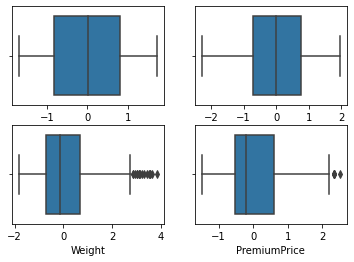

In [12]:
fig,ax=plt.subplots(nrows=2,ncols=2)
for i,j in zip(cols,ax.flatten()):
    sns.boxplot(df2[i],ax=j)
plt.show()

In [13]:
df['Age']=df2['Age']
df['Height']=df2['Height']
df['Weight']=df2['Weight']
df['PremiumPrice']=df2['PremiumPrice']

In [14]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,0.233197,0,0,0,0,-1.306105,-1.399250,0,0,0,0.106210
1,1.307981,1,0,0,0,1.170852,-0.277062,0,0,0,0.746721
2,-0.411674,1,1,0,0,-1.008870,-1.258976,0,0,1,-0.214045
3,0.734763,1,1,0,1,1.468086,1.125674,0,0,2,0.586594
4,-0.268369,0,0,0,1,-0.216244,0.774990,0,0,1,-0.214045


In [15]:
x=df.drop('PremiumPrice',axis=1)
y= df.PremiumPrice
x=sm.add_constant(x)

In [16]:
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(x, y, 
                                                    random_state=10, test_size = 0.3)

In [17]:
print('X_train_slr', X_train_slr.shape)
print('y_train_slr', y_train_slr.shape)
print('X_test_slr', X_test_slr.shape)
print('y_test_slr', y_test_slr.shape)

X_train_slr (690, 11)
y_train_slr (690,)
X_test_slr (296, 11)
y_test_slr (296,)


In [18]:
SLR_model = sm.OLS(y_train_slr, X_train_slr).fit()
SLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PremiumPrice   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     131.6
Date:                Thu, 17 Mar 2022   Prob (F-statistic):          1.24e-151
Time:                        17:00:06   Log-Likelihood:                -608.36
No. Observations:                 690   AIC:                             1239.
Df Residuals:                     679   BIC:                             1289.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1351      0.044     -3.060      0.002      -0.222      -0.048
Age                         0.7418      0.025     29.158      0.000       0.692       0.792
Diabetes                   -0.0660      0.048     -1.387      0.166      -0.159       0.027
BloodPressureProblems       0.0270      0.047      0.569      0.570      -0.066       0.120
AnyTransplants              1.2429      0.097     12.750      0.000       1.051       1.434
AnyChronicDiseases          0.4547      0.057      7.910      0.000       0.342       0.568
Height                      0.0027      0.023      0.118      0.906      -0.042       0.047
Weight                      0.1559      0.023      6.813      0.000       0.111       0.201
KnownAllergies              0.0669      0.056      1.203      0.229      -0.042       0.176
HistoryOfCancerInFamily     0.3830      0.070      5.435      0.000       0.245       0.521
NumberOfMajorSurgeries     -0.1035      0.035     -2.941      0.003      -0.173      -0.034
==============================================================================
Omnibus:                      154.664   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              833.383
Skew:                           0.889   Prob(JB):                    1.08e-181
Kurtosis:                       8.082   Cond. No.                         6.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
test_pred=SLR_model.predict(X_test_slr)
test_pred.head()

525   -0.393824
871   -1.131338
649   -0.585141
240    0.440574
661   -1.046118
dtype: float64

In [20]:
train_pred=SLR_model.predict(X_train_slr)
train_pred.head()

132   -0.177221
87    -0.897233
292   -0.312696
564   -0.124836
237   -0.258620
dtype: float64

In [21]:
mse_train = round(mean_squared_error(y_train_slr, train_pred),4)
print("Mean Squared Error (MSE) on training set: ", mse_train)
mse_test = round(mean_squared_error(y_test_slr, test_pred),4)
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  0.3415
Mean Squared Error (MSE) on test set:  0.3952


#### Model Evaluation

R-Squared - 
    The value of R-Squared is the coefficient of determination.                                                          
    It explains the percentage of variation in the dependent variable that all the independent variables explain.       
    For our base model, the value of R-Squared is 0.660.                                                                 
    We can understand that 66% variation in the Premium Price is explained by the model.
   
Adj. R-Squared - 
     It explains the percentage of variation by the independent variables that affect the target variable. The value of adjusted R-squared is always less than R-squared.                                                                      
     For our base model, the value of Adj. R-Squared is 0.655.
 
Overall F-Test & p-value of the Model - 
     F-test is used to checking whether the overall regression model is statistically significant or not. The F-statistic is given as:                                                                                                       
     f_value = (R-squared / (k-1)) / ((1- R-squared) / n - k)     
     Where, 

k: Number of beta coefficients <br>
n: Total number of observations

The test hypothesis for F-test is given as:
<p style='text-indent:25em'> <strong> H<sub>o</sub>: All β's are equal to zero </strong> (i.e. regression model is not significant) </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>: At least one β is not equal to zero </strong> (i.e. regression model is significant) </p>

For our base model, the p value is less than 0.05. Hence we accept the alternate Hypothesis and conclude that this model is significant.

#### Interpretation - Base Model

The R-Squared and the Adj. R-Squared for the full model (=1) indicates that the model perfectly fits the data which is not practical and also the model is likely to overfit. Thus, MLR Full Model cannot be considered as the best model.<br>

Overfitting occurs when a model learns the detail and noise in the training data to the extent that it adversely impacts the model's performance on the new data. We will learn about overfitting in the upcoming portion.<br>

On the other hand, R-Squared and the Adj. R-Squared for the MLR Model with Interaction is more than the MLR Model with Significant Variables. Also, the RMSE value for the MLR Model with Interaction is less as compared to that of MLR Model with Significant Variables.<br>
Thus, we can say that the MLR Model with Interaction is the best model.

### MLR Model with Forward Feature Selection

In [22]:
from sklearn.metrics import r2_score

In [23]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [24]:
cols = ['Model_Name', 'R-squared:train','R-squared:test', 'Adj. R-squared', 'MSE train','MSE test', 'RMSE train','RMSE test', 'MAE', 'MAPE']
result_table = pd.DataFrame(columns = cols)

In [27]:
MLR_full_model_metrics = pd.Series({'Model_Name': "MLR Full Model",
                     'R-squared:train':SLR_model.rsquared,
                     'R-squared:test':r2_score(y_test_slr,test_pred),
                     'Adj. R-squared': 1 - ((1-r2_score(y_test_slr,test_pred))*(X_train_slr.shape[0]-1)/(X_train_slr.shape[0]- X_train_slr.shape[1]-1)),
                     'MSE train': mse_train,  
                     'MSE test':mse_test,
                     'RMSE train':round(np.sqrt(mse_train), 4),
                     'RMSE test':round(np.sqrt(mse_test), 4),
                     'MAE': mean_absolute_error(y_test_slr, test_pred),
                     'MAPE': mean_absolute_percentage_error(y_test_slr, test_pred)
                   })

In [28]:
result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)
result_table

,Model_Name,R-squared:train,R-squared:test,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,MLR Full Model,0.659725,0.600709,0.594231,0.341500,0.395200,0.584400,0.628600,0.439066,1.136038


In [31]:
linreg=LinearRegression()
fwd=sfs(estimator=linreg,k_features='best',forward=False,cv=5,verbose=2,scoring='r2')
fwd_model=fwd.fit(X_train_slr,y_train_slr)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2022-03-17 17:03:10] Features: 10/1 -- score: 0.6502128492097414[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2022-03-17 17:03:10] Features: 9/1 -- score: 0.6513488154771864[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2022-03-17 17:03:10] Features: 8/1 -- score: 0.6513578397747756[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    random_state=10, test_size = 0.3)


In [33]:
linreg=LinearRegression()
fwd=sfs(estimator=linreg,k_features='best',forward=False,cv=5,verbose=2,scoring='r2')
fwd_model=fwd.fit(X_train_slr,y_train_slr)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2022-03-17 17:03:23] Features: 10/1 -- score: 0.6502128492097414[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-03-17 17:03:23] Features: 9/1 -- score: 0.6513488154771864[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-03-17 17:03:23] Features: 8/1 -- score: 0.6513578397747756[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [34]:
fwd_model.k_feature_names_

('Age',
 'AnyTransplants',
 'AnyChronicDiseases',
 'Weight',
 'KnownAllergies',
 'HistoryOfCancerInFamily',
 'NumberOfMajorSurgeries')

In [35]:
X_train,X_test,y_train,y_test=train_test_split(x[['const','Age','AnyTransplants','AnyChronicDiseases','Weight','KnownAllergies','HistoryOfCancerInFamily','NumberOfMajorSurgeries']],y,test_size=0.30,random_state=10)

In [36]:
rfe_model = sm.OLS(y_train, X_train).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PremiumPrice   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     188.0
Date:                Thu, 17 Mar 2022   Prob (F-statistic):          1.51e-154
Time:                        17:03:49   Log-Likelihood:                -609.44
No. Observations:                 690   AIC:                             1235.
Df Residuals:                     682   BIC:                             1271.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1548      0.035     -4.432      0.000      -0.223      -0.086
Age                         0.7382      0.025     29.735      0.000       0.689       0.787
AnyTransplants              1.2486      0.097     12.850      0.000       1.058       1.439
AnyChronicDiseases          0.4635      0.057      8.122      0.000       0.351       0.576
Weight                      0.1557      0.023      6.850      0.000       0.111       0.200
KnownAllergies              0.0735      0.055      1.329      0.184      -0.035       0.182
HistoryOfCancerInFamily     0.3919      0.070      5.590      0.000       0.254       0.530
NumberOfMajorSurgeries     -0.1029      0.035     -2.974      0.003      -0.171      -0.035
==============================================================================
Omnibus:                      156.974   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              865.526
Skew:                           0.897   Prob(JB):                    1.13e-188
Kurtosis:                       8.185   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
test_pred=rfe_model.predict(X_test)
train_pred=rfe_model.predict(X_train)

In [38]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
print("Mean Squared Error (MSE) on training set: ", mse_train)
mse_test = round(mean_squared_error(y_test, test_pred),4)
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  0.3425
Mean Squared Error (MSE) on test set:  0.3966


In [39]:
MLR_full_model_metrics = pd.Series({'Model_Name': "MLR Model FWD",
                     'R-squared:train': rfe_model.rsquared,
                     'R-squared:test':r2_score(y_test,test_pred),
                     'Adj. R-squared':1 - ((1-r2_score(y_test,test_pred))*(X_train.shape[0]-1)/(X_train.shape[0]- X_train.shape[1]-1)),
                     'MSE train': mse_train,  
                     'MSE test':mse_test,
                     'RMSE train':round(np.sqrt(mse_train), 4),
                     'RMSE test':round(np.sqrt(mse_test), 4),
                     'MAE': mean_absolute_error(y_test, test_pred),
                     'MAPE': mean_absolute_percentage_error(y_test, test_pred)
                   })

In [40]:
result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)
result_table

,Model_Name,R-squared:train,R-squared:test,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,MLR Full Model,0.659725,0.600709,0.594231,0.341500,0.395200,0.584400,0.628600,0.439066,1.136038
1,MLR Model FWD,0.658665,0.599367,0.594660,0.342500,0.396600,0.585200,0.629800,0.440398,1.132491


In [41]:
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'r2')

In [42]:
print('All scores: ', scores)
print("\nMinimum score obtained: ", round(min(scores), 4))
print("Maximum score obtained: ", round(max(scores), 4))
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.72927773 0.70437158 0.54503906 0.69816874 0.57993208]

Minimum score obtained:  0.545
Maximum score obtained:  0.7293
Average score obtained:  0.6514


In this model, we have used the Forward Feature Selection technique to select the significant features for the model.      
The selected features are: 'Age','AnyTransplants','AnyChronicDiseases','Weight','KnownAllergies','HistoryOfCancerInFamily','NumberOfMajorSurgeries'
Now, full Model is built with these features. 

We can observe that the value of R-Squared and Adj. R-Squared have reduced a bit.
The other values such as MSE, RMSE, MAE and MAPE have been almost same for both test and the train data

### Gradient Descent Model

In [43]:
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x[['const','Age','AnyTransplants','AnyChronicDiseases','Weight','HistoryOfCancerInFamily','NumberOfMajorSurgeries']], y, test_size = 0.30, random_state = 10)

In [45]:
sgd = SGDRegressor(random_state = 10)
linreg_with_SGD = sgd.fit(X_train, y_train)

In [46]:
test_pred=linreg_with_SGD.predict(X_test)
train_pred=linreg_with_SGD.predict(X_train)

In [47]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
print("Mean Squared Error (MSE) on training set: ", mse_train)
mse_test = round(mean_squared_error(y_test, test_pred),4)
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  0.3601
Mean Squared Error (MSE) on test set:  0.413


In [48]:
MLR_full_model_metrics = pd.Series({'Model_Name': "GD model",
                     'R-squared:train':linreg_with_SGD.score(X_test,y_test),
                     'R-squared:test':linreg_with_SGD.score(X_test,y_test),
                     'Adj. R-squared': 1 - ((1-linreg_with_SGD.score(X_test,y_test))*(X_train.shape[0]-1)/(X_train.shape[0]- X_train.shape[1]-1)),
                     'MSE train': mse_train,  
                     'MSE test':mse_test,
                     'RMSE train':round(np.sqrt(mse_train), 4),
                     'RMSE test':round(np.sqrt(mse_test), 4),
                     'MAE': mean_absolute_error(y_test, test_pred),
                     'MAPE': mean_absolute_percentage_error(y_test, test_pred)
                   })

In [49]:
result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)
result_table

,Model_Name,R-squared:train,R-squared:test,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,MLR Full Model,0.659725,0.600709,0.594231,0.341500,0.395200,0.584400,0.628600,0.439066,1.136038
1,MLR Model FWD,0.658665,0.599367,0.594660,0.342500,0.396600,0.585200,0.629800,0.440398,1.132491
2,GD model,0.582790,0.582790,0.578508,0.360100,0.413000,0.600100,0.642700,0.452824,1.125142


The gradient descent method considers all the data points to calculate the values of the parameters at each step. For a very large dataset, this method becomes computationally expensive. To avoid this problem, we use Stochastic Gradient Descent (SGD) which considers a single data point (sample) to perform each iteration. Each sample is randomly selected for performing the iteration.

We can observe that the The coefficients obtained from SGD have smaller values as compared to the coefficients obtained from linear regression using OLS.

### Ridge Regularization ( with alpha = 1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 10)

In [56]:
ridge = Ridge(alpha = 1, max_iter = 500)
ridge.fit(X_train, y_train)

Ridge(alpha=1, max_iter=500)

In [57]:
test_pred=ridge.predict(X_test)
train_pred=ridge.predict(X_train)

In [58]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
print("Mean Squared Error (MSE) on training set: ", mse_train)
mse_test = round(mean_squared_error(y_test, test_pred),4)
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  0.3415
Mean Squared Error (MSE) on test set:  0.3953


In [59]:
MLR_full_model_metrics = pd.Series({'Model_Name': "Ridge (alpha=1)",
                     'R-squared:train':ridge.score(X_train,y_train),
                     'R-squared:test':ridge.score(X_test,y_test),
                     'Adj. R-squared': 1 - ((1-ridge.score(X_test,y_test))*(X_train.shape[0]-1)/(X_train.shape[0]- X_train.shape[1]-1)),
                     'MSE train': mse_train,  
                     'MSE test':mse_test,
                     'RMSE train':round(np.sqrt(mse_train), 4),
                     'RMSE test':round(np.sqrt(mse_test), 4),
                     'MAE': mean_absolute_error(y_test, test_pred),
                     'MAPE': mean_absolute_percentage_error(y_test, test_pred)
                   })

In [60]:
result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)
result_table

,Model_Name,R-squared:train,R-squared:test,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,MLR Full Model,0.659725,0.600709,0.594231,0.341500,0.395200,0.584400,0.628600,0.439066,1.136038
1,MLR Model FWD,0.658665,0.599367,0.594660,0.342500,0.396600,0.585200,0.629800,0.440398,1.132491
2,GD model,0.582790,0.582790,0.578508,0.360100,0.413000,0.600100,0.642700,0.452824,1.125142
3,Ridge (alpha=1),0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520


### Ridge Regularization (with alpha =2 )

In [61]:
ridge = Ridge(alpha = 2, max_iter = 500)
ridge.fit(X_train, y_train)

Ridge(alpha=2, max_iter=500)

In [62]:
test_pred=ridge.predict(X_test)
train_pred=ridge.predict(X_train)

In [63]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
print("Mean Squared Error (MSE) on training set: ", mse_train)
mse_test = round(mean_squared_error(y_test, test_pred),4)
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  0.3417
Mean Squared Error (MSE) on test set:  0.3955


In [64]:
MLR_full_model_metrics = pd.Series({'Model_Name': "Ridge (alpha=2)",
                     'R-squared:train':ridge.score(X_train,y_train),
                     'R-squared:test':ridge.score(X_test,y_test),
                     'Adj. R-squared': 1 - ((1-ridge.score(X_test,y_test))*(X_train.shape[0]-1)/(X_train.shape[0]- X_train.shape[1]-1)),
                     'MSE train': mse_train,  
                     'MSE test':mse_test,
                     'RMSE train':round(np.sqrt(mse_train), 4),
                     'RMSE test':round(np.sqrt(mse_test), 4),
                     'MAE': mean_absolute_error(y_test, test_pred),
                     'MAPE': mean_absolute_percentage_error(y_test, test_pred)
                   })

In [65]:
result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)
result_table

,Model_Name,R-squared:train,R-squared:test,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,MLR Full Model,0.659725,0.600709,0.594231,0.341500,0.395200,0.584400,0.628600,0.439066,1.136038
1,MLR Model FWD,0.658665,0.599367,0.594660,0.342500,0.396600,0.585200,0.629800,0.440398,1.132491
2,GD model,0.582790,0.582790,0.578508,0.360100,0.413000,0.600100,0.642700,0.452824,1.125142
3,Ridge (alpha=1),0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
4,Ridge (alpha=2),0.659477,0.600435,0.593952,0.341700,0.395500,0.584600,0.628900,0.440080,1.131099


#### Fine Tuning the Parameters Using Grid SearchCV

In [66]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1,2,3,4, 5, 10, 20, 40, 60, 80, 100]}]

ridge = Ridge()


ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

ridge_grid.fit(X_train, y_train)
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')



Best parameters for Ridge Regression:  {'alpha': 1} 



In [67]:
ridge = Ridge(alpha = 1, max_iter = 500)
ridge.fit(X_train, y_train)

Ridge(alpha=1, max_iter=500)

In [68]:
test_pred=ridge.predict(X_test)
train_pred=ridge.predict(X_train)

In [69]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
print("Mean Squared Error (MSE) on training set: ", mse_train)
mse_test = round(mean_squared_error(y_test, test_pred),4)
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  0.3415
Mean Squared Error (MSE) on test set:  0.3953


In [70]:
MLR_full_model_metrics = pd.Series({'Model_Name': "Ridge gridsearch",
                     'R-squared:train':ridge.score(X_train,y_train),
                     'R-squared:test':ridge.score(X_test,y_test),
                     'Adj. R-squared': 1 - ((1-ridge.score(X_test,y_test))*(X_train.shape[0]-1)/(X_train.shape[0]- X_train.shape[1]-1)),
                     'MSE train': mse_train,  
                     'MSE test':mse_test,
                     'RMSE train':round(np.sqrt(mse_train), 4),
                     'RMSE test':round(np.sqrt(mse_test), 4),
                     'MAE': mean_absolute_error(y_test, test_pred),
                     'MAPE': mean_absolute_percentage_error(y_test, test_pred)
                   })

In [71]:
result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)
result_table

,Model_Name,R-squared:train,R-squared:test,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,MLR Full Model,0.659725,0.600709,0.594231,0.341500,0.395200,0.584400,0.628600,0.439066,1.136038
1,MLR Model FWD,0.658665,0.599367,0.594660,0.342500,0.396600,0.585200,0.629800,0.440398,1.132491
2,GD model,0.582790,0.582790,0.578508,0.360100,0.413000,0.600100,0.642700,0.452824,1.125142
3,Ridge (alpha=1),0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
4,Ridge (alpha=2),0.659477,0.600435,0.593952,0.341700,0.395500,0.584600,0.628900,0.440080,1.131099
5,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520


### Lasso Regularization

In [73]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1,2,3,4, 5, 10, 20]}]

lasso = Lasso()

lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)


lasso_grid.fit(X_train, y_train)

print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')


Best parameters for Lasso Regression:  {'alpha': 0.001} 



In [74]:
lasso = Lasso(alpha = 0.001, max_iter = 500)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, max_iter=500)

In [75]:
test_pred=lasso.predict(X_test)
train_pred=lasso.predict(X_train)

In [76]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
print("Mean Squared Error (MSE) on training set: ", mse_train)
mse_test = round(mean_squared_error(y_test, test_pred),4)
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  0.3415
Mean Squared Error (MSE) on test set:  0.395


In [77]:
MLR_full_model_metrics = pd.Series({'Model_Name': "lasso gridsearch",
                     'R-squared:train':lasso.score(X_train,y_train),
                     'R-squared:test':lasso.score(X_test,y_test),
                     'Adj. R-squared': 1 - ((1-lasso.score(X_test,y_test))*(X_train.shape[0]-1)/(X_train.shape[0]- X_train.shape[1]-1)),
                     'MSE train': mse_train,  
                     'MSE test':mse_test,
                     'RMSE train':round(np.sqrt(mse_train), 4),
                     'RMSE test':round(np.sqrt(mse_test), 4),
                     'MAE': mean_absolute_error(y_test, test_pred),
                     'MAPE': mean_absolute_percentage_error(y_test, test_pred)
                   })

In [78]:
result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)
result_table

,Model_Name,R-squared:train,R-squared:test,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,MLR Full Model,0.659725,0.600709,0.594231,0.341500,0.395200,0.584400,0.628600,0.439066,1.136038
1,MLR Model FWD,0.658665,0.599367,0.594660,0.342500,0.396600,0.585200,0.629800,0.440398,1.132491
2,GD model,0.582790,0.582790,0.578508,0.360100,0.413000,0.600100,0.642700,0.452824,1.125142
3,Ridge (alpha=1),0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
4,Ridge (alpha=2),0.659477,0.600435,0.593952,0.341700,0.395500,0.584600,0.628900,0.440080,1.131099
5,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
6,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
7,lasso gridsearch,0.659667,0.600986,0.594512,0.341500,0.395000,0.584400,0.628500,0.439299,1.130515


### Elasticnet Regression

In [79]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1,2,3,4, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]
  
enet = ElasticNet()
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

enet_grid.fit(X_train, y_train)
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')


Best parameters for Elastic Net Regression:  {'alpha': 0.001, 'l1_ratio': 0.2} 



In [80]:
enet = ElasticNet(alpha = 0.001, l1_ratio = 0.2, max_iter = 500)
enet.fit(X_train, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.2, max_iter=500)

In [81]:
test_pred=enet.predict(X_test)
train_pred=enet.predict(X_train)

In [82]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
print("Mean Squared Error (MSE) on training set: ", mse_train)
mse_test = round(mean_squared_error(y_test, test_pred),4)
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  0.3415
Mean Squared Error (MSE) on test set:  0.3952


In [83]:
MLR_full_model_metrics = pd.Series({'Model_Name': "elasticnet gridsearch",
                     'R-squared:train':enet.score(X_train,y_train),
                     'R-squared:test':enet.score(X_test,y_test),
                     'Adj. R-squared': 1 - ((1-enet.score(X_test,y_test))*(X_train.shape[0]-1)/(X_train.shape[0]- X_train.shape[1]-1)),
                     'MSE train': mse_train,  
                     'MSE test':mse_test,
                     'RMSE train':round(np.sqrt(mse_train), 4),
                     'RMSE test':round(np.sqrt(mse_test), 4),
                     'MAE': mean_absolute_error(y_test, test_pred),
                     'MAPE': mean_absolute_percentage_error(y_test, test_pred)
                   })

In [84]:
result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)
result_table

,Model_Name,R-squared:train,R-squared:test,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,MLR Full Model,0.659725,0.600709,0.594231,0.341500,0.395200,0.584400,0.628600,0.439066,1.136038
1,MLR Model FWD,0.658665,0.599367,0.594660,0.342500,0.396600,0.585200,0.629800,0.440398,1.132491
2,GD model,0.582790,0.582790,0.578508,0.360100,0.413000,0.600100,0.642700,0.452824,1.125142
3,Ridge (alpha=1),0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
4,Ridge (alpha=2),0.659477,0.600435,0.593952,0.341700,0.395500,0.584600,0.628900,0.440080,1.131099
5,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
6,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
7,lasso gridsearch,0.659667,0.600986,0.594512,0.341500,0.395000,0.584400,0.628500,0.439299,1.130515
8,elasticnet gridsearch,0.659692,0.600731,0.594253,0.341500,0.395200,0.584400,0.628600,0.439373,1.133524


One way to deal with the overfitting problem is by adding the Regularization to the model. It is observed that inflation of the coefficients cause overfitting. To prevent overfitting, it is important to regulate the coefficients by penalizing possible coefficient inflations. Regularization imposes penalties on parameters if they inflate to large values to prevent them from being weighted too heavily. In this section, we will learn about the three regularization techniques:

1.  Ridge Regression:                                                                                                  
Most of the times our data can show multicollinearity in the variables. To analyze such data we can use Ridge Regression. It uses the L2 norm for regularization.                                                                 
    After applying the ridge regression with alpha equal to one (which is the optimal value using GridSearchCV), we get 0.6287 as the RMSE value.                       
    After applying the ridge regression with alpha equal to two, the RMSE value changed to 0.6289
    The coefficients obtained from ridge regression have smaller values as compared to the coefficients obtained from the previous model
    
    
2. Lasso Regression:                                                                                                 
Lasso regression shrinks the less important variable's coefficient to zero which makes this technique more useful when we are dealing with large number of variables.                                                                              
It is a type of regularization technique that uses L1 norm for regularization.
 After applying the lasso regression with alpha equal to 0.01(which is the optimal value using the GridSearchCV), the RMSE value is 0.6285


3. Elastic Net Regression:                                                                                            
This technique is a combination of Rigde and Lasso reression techniques. It considers the linear combination of penalties for L1 and L2 regularization.                                                                                            
With the elastic-net regression with optimal value using the GridSearchCV we get 0.6286 as the RMSE value.

GridSearchCV:                                                                                              
Hyperparameters are the parameters in the model that are preset by the user. GridSearch considers all the combinations of hyperparameters and returns the best hyperparameter values.                                                      
Following are some of the parameters that GridSearchCV takes:

estimator: pass the machine learning algorithm model                                                            
param_grid: takes a dictionary having parameter names as keys and list of parameters as values                       
cv: number of folds for k-fold cross validation

### DecisionTreeRegressor

In [85]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
x=df.drop('PremiumPrice',axis=1)
y=df.PremiumPrice
xc=sm.add_constant(x)
X_train,X_test,y_train,y_test=train_test_split(xc,y,test_size=0.30,random_state=10)

In [87]:
for i in range(2,12):
    if i==2:
        cols = ['Model_Name', 'R-squared', 'Adj. R-squared', 'MSE train','MSE test', 'RMSE train','RMSE test', 'MAE', 'MAPE']
        Decision_tree = pd.DataFrame(columns = cols)
    decision=DecisionTreeRegressor(max_features=i,random_state=10)
    dc=decision.fit(X_train,y_train)
    test_pred=dc.predict(X_test)
    train_pred=dc.predict(X_train)
    mse_train = round(mean_squared_error(y_train, train_pred),4)
    mse_test = round(mean_squared_error(y_test, test_pred),4)
    MLR_full_model_metrics = pd.Series({'Model_Name': "decisiontree regressor"+'Max features='+str(i),
                                        'R-squared':dc.score(X_test,y_test),
                                        'Adj. R-squared': 1 - ((1-dc.score(X_test,y_test))*(X_train.shape[0]-1)/(X_train.shape[0]- X_train.shape[1]-1)),
                                        'MSE train': mse_train,  
                                        'MSE test':mse_test,
                                        'RMSE train':round(np.sqrt(mse_train), 4),
                                        'RMSE test':round(np.sqrt(mse_test), 4),
                                        'MAE': mean_absolute_error(y_test, test_pred),
                                        'MAPE': mean_absolute_percentage_error(y_test, test_pred)
                                      })
    Decision_tree = Decision_tree.append(MLR_full_model_metrics, ignore_index = True)
    
    
Decision_tree

,Model_Name,R-squared,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,decisiontree regressorMax features=2,0.636022,0.630117,0.000000,0.360300,0.000000,0.600200,0.245060,0.685918
1,decisiontree regressorMax features=3,0.531616,0.524016,0.000000,0.463600,0.000000,0.680900,0.255339,0.433808
2,decisiontree regressorMax features=4,0.763007,0.759162,0.000000,0.234600,0.000000,0.484400,0.154718,0.486185
3,decisiontree regressorMax features=5,0.514025,0.506140,0.000000,0.481000,0.000000,0.693500,0.272109,0.911097
4,decisiontree regressorMax features=6,0.636284,0.630383,0.000000,0.360000,0.000000,0.600000,0.206651,0.451607
5,decisiontree regressorMax features=7,0.737978,0.733727,0.000000,0.259400,0.000000,0.509300,0.148226,0.334841
6,decisiontree regressorMax features=8,0.736753,0.732482,0.000000,0.260600,0.000000,0.510500,0.131997,0.221093
7,decisiontree regressorMax features=9,0.710673,0.705979,0.000000,0.286400,0.000000,0.535200,0.141735,0.305763
8,decisiontree regressorMax features=10,0.687306,0.682233,0.000000,0.309500,0.000000,0.556300,0.148767,0.257317
9,decisiontree regressorMax features=11,0.785411,0.781930,0.000000,0.212400,0.000000,0.460900,0.107112,0.196783


Decision tree tends to overfit requires grid search

In [88]:
dc=DecisionTreeRegressor(max_depth=6,max_features=11,max_leaf_nodes=9,min_samples_leaf=5,min_samples_split=2,random_state=10)

In [89]:
decision=dc.fit(X_train,y_train)

In [90]:
test_pred=decision.predict(X_test)
train_pred=decision.predict(X_train)

In [91]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
mse_test = round(mean_squared_error(y_test, test_pred),4)
MLR_full_model_metrics = pd.Series({'Model_Name': "decisiontreeregressor grid search",
                                    'R-squared:train':decision.score(X_train,y_train),
                                        'R-squared:test':decision.score(X_test,y_test),
                                        'Adj. R-squared': 1 - ((1-decision.score(X_test,y_test))*(X_train.shape[0]-1)/(X_train.shape[0]- X_train.shape[1]-1)),
                                        'MSE train': mse_train,  
                                        'MSE test':mse_test,
                                        'RMSE train':round(np.sqrt(mse_train), 4),
                                        'RMSE test':round(np.sqrt(mse_test), 4),
                                        'MAE': mean_absolute_error(y_test, test_pred),
                                        'MAPE': mean_absolute_percentage_error(y_test, test_pred)
                                      })

In [92]:
result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)
result_table

,Model_Name,R-squared:train,R-squared:test,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,MLR Full Model,0.659725,0.600709,0.594231,0.341500,0.395200,0.584400,0.628600,0.439066,1.136038
1,MLR Model FWD,0.658665,0.599367,0.594660,0.342500,0.396600,0.585200,0.629800,0.440398,1.132491
2,GD model,0.582790,0.582790,0.578508,0.360100,0.413000,0.600100,0.642700,0.452824,1.125142
3,Ridge (alpha=1),0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
4,Ridge (alpha=2),0.659477,0.600435,0.593952,0.341700,0.395500,0.584600,0.628900,0.440080,1.131099
5,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
6,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
7,lasso gridsearch,0.659667,0.600986,0.594512,0.341500,0.395000,0.584400,0.628500,0.439299,1.130515
8,elasticnet gridsearch,0.659692,0.600731,0.594253,0.341500,0.395200,0.584400,0.628600,0.439373,1.133524
9,decisiontreeregressor grid search,0.762111,0.769505,0.765765,0.238700,0.228100,0.488600,0.477600,0.263866,0.651508


Decision Tree is a non-parametric supervised learning method. It builds a model in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets, which is called splitting. A decision node is a node on which a decision of split is to be made. A node that can not be split further is known as the terminal/leaf node. A leaf node represents the decision. A decision tree can work with both numerical and categorical variables.

The decision tree is said to be over-fitted if it tries to perfectly fit all the observations in the training data. We can calculate the difference between the train and test accuracy to identify if there is over-fitting.

If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

Hence we used the hyperparameter tuning to get the best results from the Decision Tree.

### RandomForestRegressor (with n_estimators = 100)

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
r=RandomForestRegressor()

In [95]:
for i in range(2,12):
    if i==2:
        cols = ['Model_Name', 'R-squared', 'Adj. R-squared', 'MSE train','MSE test', 'RMSE train','RMSE test', 'MAE', 'MAPE']
        random_forest = pd.DataFrame(columns = cols)
    r=RandomForestRegressor(max_features=i,random_state=10)
    rf=r.fit(X_train,y_train)
    test_pred=rf.predict(X_test)
    train_pred=rf.predict(X_train)
    mse_train = round(mean_squared_error(y_train, train_pred),4)
    mse_test = round(mean_squared_error(y_test, test_pred),4)
    MLR_full_model_metrics = pd.Series({'Model_Name': "decisiontree regressor"+'Max features='+str(i),
                                        'R-squared':rf.score(X_test,y_test),
                                        'Adj. R-squared': 1 - ((1-rf.score(X_test,y_test))*(X_train.shape[0]-1)/(X_train.shape[0]- X_train.shape[1]-1)),
                                        'MSE train': mse_train,  
                                        'MSE test':mse_test,
                                        'RMSE train':round(np.sqrt(mse_train), 4),
                                        'RMSE test':round(np.sqrt(mse_test), 4),
                                        'MAE': mean_absolute_error(y_test, test_pred),
                                        'MAPE': mean_absolute_percentage_error(y_test, test_pred)
                                      })
    random_forest = random_forest.append(MLR_full_model_metrics, ignore_index = True)
    
    
random_forest

,Model_Name,R-squared,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,decisiontree regressorMax features=2,0.739098,0.734865,0.039200,0.258200,0.198000,0.508100,0.301311,0.625054
1,decisiontree regressorMax features=3,0.775563,0.771921,0.034900,0.222200,0.186800,0.471400,0.254830,0.575561
2,decisiontree regressorMax features=4,0.795479,0.792161,0.032200,0.202400,0.179400,0.449900,0.228864,0.520452
3,decisiontree regressorMax features=5,0.810613,0.807540,0.031500,0.187500,0.177500,0.433000,0.198531,0.454420
4,decisiontree regressorMax features=6,0.818467,0.815522,0.031600,0.179700,0.177800,0.423900,0.185840,0.400213
5,decisiontree regressorMax features=7,0.828375,0.825590,0.030200,0.169900,0.173800,0.412200,0.164461,0.349555
6,decisiontree regressorMax features=8,0.822581,0.819703,0.031300,0.175600,0.176900,0.419000,0.160496,0.331275
7,decisiontree regressorMax features=9,0.823370,0.820504,0.029600,0.174800,0.172000,0.418100,0.151072,0.296892
8,decisiontree regressorMax features=10,0.818994,0.816058,0.030300,0.179200,0.174100,0.423300,0.146300,0.281592
9,decisiontree regressorMax features=11,0.817406,0.814444,0.031000,0.180700,0.176100,0.425100,0.143682,0.272198


In [96]:
r= RandomForestRegressor(random_state=10,criterion='mse',max_depth=9,max_leaf_nodes=9,min_samples_leaf=1,min_samples_split=9)
rf = r.fit(X_train,y_train)

In [97]:
test_pred=dc.predict(X_test)
train_pred=dc.predict(X_train)
mse_train = round(mean_squared_error(y_train, train_pred),4)
mse_test = round(mean_squared_error(y_test, test_pred),4)
MLR_full_model_metrics = pd.Series({'Model_Name': "Randomforestregressor grid search(n=100)",
                                        'R-squared:train':rf.score(X_train,y_train),
                                        'R-squared:test':rf.score(X_test,y_test),
                                        'Adj. R-squared': 1 - ((1-rf.score(X_test,y_test))*(X_train.shape[0]-1)/(X_train.shape[0]- X_train.shape[1]-1)),
                                        'MSE train': mse_train,  
                                        'MSE test':mse_test,
                                        'RMSE train':round(np.sqrt(mse_train), 4),
                                        'RMSE test':round(np.sqrt(mse_test), 4),
                                        'MAE': mean_absolute_error(y_test, test_pred),
                                        'MAPE': mean_absolute_percentage_error(y_test, test_pred)
                                      })

In [98]:
result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)
result_table

,Model_Name,R-squared:train,R-squared:test,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,MLR Full Model,0.659725,0.600709,0.594231,0.341500,0.395200,0.584400,0.628600,0.439066,1.136038
1,MLR Model FWD,0.658665,0.599367,0.594660,0.342500,0.396600,0.585200,0.629800,0.440398,1.132491
2,GD model,0.582790,0.582790,0.578508,0.360100,0.413000,0.600100,0.642700,0.452824,1.125142
3,Ridge (alpha=1),0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
4,Ridge (alpha=2),0.659477,0.600435,0.593952,0.341700,0.395500,0.584600,0.628900,0.440080,1.131099
5,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
6,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
7,lasso gridsearch,0.659667,0.600986,0.594512,0.341500,0.395000,0.584400,0.628500,0.439299,1.130515
8,elasticnet gridsearch,0.659692,0.600731,0.594253,0.341500,0.395200,0.584400,0.628600,0.439373,1.133524
9,decisiontreeregressor grid search,0.762111,0.769505,0.765765,0.238700,0.228100,0.488600,0.477600,0.263866,0.651508


### RandomForestRegressor(with n_estimators = 50)

In [99]:
r= RandomForestRegressor(n_estimators=50,random_state=10,criterion='mse',max_depth=9,max_leaf_nodes=9,min_samples_leaf=1,min_samples_split=9)
rf=r.fit(X_train,y_train)

In [100]:
test_pred=rf.predict(X_test)
train_pred=rf.predict(X_train)
mse_train = round(mean_squared_error(y_train, train_pred),4)
mse_test = round(mean_squared_error(y_test, test_pred),4)
MLR_full_model_metrics = pd.Series({'Model_Name': "Randomforestregressor grid search(n=50)",
                                        'R-squared:train':rf.score(X_train,y_train),
                                        'R-squared:test':rf.score(X_test,y_test),
                                        'Adj. R-squared': 1 - ((1-rf.score(X_test,y_test))*(X_train.shape[0]-1)/(X_train.shape[0]- X_train.shape[1]-1)),
                                        'MSE train': mse_train,  
                                        'MSE test':mse_test,
                                        'RMSE train':round(np.sqrt(mse_train), 4),
                                        'RMSE test':round(np.sqrt(mse_test), 4),
                                        'MAE': mean_absolute_error(y_test, test_pred),
                                        'MAPE': mean_absolute_percentage_error(y_test, test_pred)
                                      })

In [101]:
result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)
result_table

,Model_Name,R-squared:train,R-squared:test,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,MLR Full Model,0.659725,0.600709,0.594231,0.341500,0.395200,0.584400,0.628600,0.439066,1.136038
1,MLR Model FWD,0.658665,0.599367,0.594660,0.342500,0.396600,0.585200,0.629800,0.440398,1.132491
2,GD model,0.582790,0.582790,0.578508,0.360100,0.413000,0.600100,0.642700,0.452824,1.125142
3,Ridge (alpha=1),0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
4,Ridge (alpha=2),0.659477,0.600435,0.593952,0.341700,0.395500,0.584600,0.628900,0.440080,1.131099
5,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
6,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
7,lasso gridsearch,0.659667,0.600986,0.594512,0.341500,0.395000,0.584400,0.628500,0.439299,1.130515
8,elasticnet gridsearch,0.659692,0.600731,0.594253,0.341500,0.395200,0.584400,0.628600,0.439373,1.133524
9,decisiontreeregressor grid search,0.762111,0.769505,0.765765,0.238700,0.228100,0.488600,0.477600,0.263866,0.651508


In [102]:
r= RandomForestRegressor(n_estimators=50,random_state=10,criterion='mse',max_depth=9,min_samples_split=9,max_features='auto')
rf=r.fit(X_train,y_train)

In [103]:
test_pred=rf.predict(X_test)
train_pred=rf.predict(X_train)
mse_train = round(mean_squared_error(y_train, train_pred),4)
mse_test = round(mean_squared_error(y_test, test_pred),4)
MLR_full_model_metrics = pd.Series({'Model_Name': "Randomforestregressor grid search(n=50)2",
                                        'R-squared:train':rf.score(X_train,y_train),
                                        'R-squared:test':rf.score(X_test,y_test),
                                        'Adj. R-squared': 1 - ((1-rf.score(X_test,y_test))*(X_train.shape[0]-1)/(X_train.shape[0]- X_train.shape[1]-1)),
                                        'MSE train': mse_train,  
                                        'MSE test':mse_test,
                                        'RMSE train':round(np.sqrt(mse_train), 4),
                                        'RMSE test':round(np.sqrt(mse_test), 4),
                                        'MAE': mean_absolute_error(y_test, test_pred),
                                        'MAPE': mean_absolute_percentage_error(y_test, test_pred)
                                      })

In [104]:
round(rf.score(X_test,y_test),2),round(rf.score(X_train,y_train),2)

(0.84, 0.89)

In [105]:
MLR_full_model_metrics

Model_Name         Randomforestregressor grid search(n=50)2
R-squared:train                                    0.890429
R-squared:test                                     0.836034
Adj. R-squared                                     0.833374
MSE train                                          0.110000
MSE test                                           0.162300
RMSE train                                         0.331700
RMSE test                                          0.402900
MAE                                                0.143236
MAPE                                               0.285824
dtype: object

In [106]:
result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)
result_table

,Model_Name,R-squared:train,R-squared:test,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,MLR Full Model,0.659725,0.600709,0.594231,0.341500,0.395200,0.584400,0.628600,0.439066,1.136038
1,MLR Model FWD,0.658665,0.599367,0.594660,0.342500,0.396600,0.585200,0.629800,0.440398,1.132491
2,GD model,0.582790,0.582790,0.578508,0.360100,0.413000,0.600100,0.642700,0.452824,1.125142
3,Ridge (alpha=1),0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
4,Ridge (alpha=2),0.659477,0.600435,0.593952,0.341700,0.395500,0.584600,0.628900,0.440080,1.131099
5,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
6,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
7,lasso gridsearch,0.659667,0.600986,0.594512,0.341500,0.395000,0.584400,0.628500,0.439299,1.130515
8,elasticnet gridsearch,0.659692,0.600731,0.594253,0.341500,0.395200,0.584400,0.628600,0.439373,1.133524
9,decisiontreeregressor grid search,0.762111,0.769505,0.765765,0.238700,0.228100,0.488600,0.477600,0.263866,0.651508


### RandomForestRegressor (with n_estimators = 70)

In [107]:
r= RandomForestRegressor(n_estimators=70,random_state=10,criterion='mse',max_depth=9,min_samples_split=9,max_features='auto')
rf=r.fit(X_train,y_train)

In [108]:
test_pred=rf.predict(X_test)
train_pred=rf.predict(X_train)
mse_train = round(mean_squared_error(y_train, train_pred),4)
mse_test = round(mean_squared_error(y_test, test_pred),4)
MLR_full_model_metrics = pd.Series({'Model_Name': "Randomforestregressor grid search(n=70)",
                                        'R-squared:train':rf.score(X_train,y_train),
                                        'R-squared:test':rf.score(X_test,y_test),
                                        'Adj. R-squared': 1 - ((1-rf.score(X_test,y_test))*(X_train.shape[0]-1)/(X_train.shape[0]- X_train.shape[1]-1)),
                                        'MSE train': mse_train,  
                                        'MSE test':mse_test,
                                        'RMSE train':round(np.sqrt(mse_train), 4),
                                        'RMSE test':round(np.sqrt(mse_test), 4),
                                        'MAE': mean_absolute_error(y_test, test_pred),
                                        'MAPE': mean_absolute_percentage_error(y_test, test_pred)
                                      })

In [109]:
rf.score(X_test,y_test),rf.score(X_train,y_train)

(0.8348412400276468, 0.8892856672947166)

In [110]:
result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)
result_table

,Model_Name,R-squared:train,R-squared:test,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,MLR Full Model,0.659725,0.600709,0.594231,0.341500,0.395200,0.584400,0.628600,0.439066,1.136038
1,MLR Model FWD,0.658665,0.599367,0.594660,0.342500,0.396600,0.585200,0.629800,0.440398,1.132491
2,GD model,0.582790,0.582790,0.578508,0.360100,0.413000,0.600100,0.642700,0.452824,1.125142
3,Ridge (alpha=1),0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
4,Ridge (alpha=2),0.659477,0.600435,0.593952,0.341700,0.395500,0.584600,0.628900,0.440080,1.131099
5,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
6,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
7,lasso gridsearch,0.659667,0.600986,0.594512,0.341500,0.395000,0.584400,0.628500,0.439299,1.130515
8,elasticnet gridsearch,0.659692,0.600731,0.594253,0.341500,0.395200,0.584400,0.628600,0.439373,1.133524
9,decisiontreeregressor grid search,0.762111,0.769505,0.765765,0.238700,0.228100,0.488600,0.477600,0.263866,0.651508


It is the method of constructing multiple decision trees on randomly selected data samples. We can use the bootstrap sampling method to select the random samples of the same size from the dataset to construct multiple trees. This method is used for both regression and classification analysis. The random forest returns the prediction based on all the individual decision trees prediction. For regression, it returns the average of all the predicted values; and for classification, it returns the class, which is the mode of all the predicted classes.

It avoids the over-fitting problem as it considers a random data sample to construct a decision tree.



To avoid the problem of Overfiting of the Decision Tree, we have used the RandomForestRegressor.

We have fine tuned the hyperparameters of the RandomForestRegressor to get the best results.

For n_estimators = 50, we got the Maximum value of RMSE as 0.8904 and also we can observe that the MSE, RMSE values have significantly reduced using this method

### Boosting

In [111]:
from sklearn.ensemble import AdaBoostRegressor,StackingRegressor
from xgboost import XGBRegressor

In [112]:
ada_model = AdaBoostRegressor(random_state = 10)
ada_model.fit(X_train, y_train)

AdaBoostRegressor(random_state=10)

In [113]:
test_pred=ada_model.predict(X_test)
train_pred=ada_model.predict(X_train)
mse_train = round(mean_squared_error(y_train, train_pred),4)
mse_test = round(mean_squared_error(y_test, test_pred),4)
MLR_full_model_metrics = pd.Series({'Model_Name': "Adaboost base model",
                                    'R-squared:train':ada_model.score(X_train,y_train),
                                        'R-squared:test':ada_model.score(X_test,y_test),
                                        'Adj. R-squared': 1 - ((1-ada_model.score(X_test,y_test))*(X_train.shape[0]-1)/(X_train.shape[0]- X_train.shape[1]-1)),
                                        'MSE train': mse_train,  
                                        'MSE test':mse_test,
                                        'RMSE train':round(np.sqrt(mse_train), 4),
                                        'RMSE test':round(np.sqrt(mse_test), 4),
                                        'MAE': mean_absolute_error(y_test, test_pred),
                                        'MAPE': mean_absolute_percentage_error(y_test, test_pred)
                                      })

In [114]:
result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)
result_table

,Model_Name,R-squared:train,R-squared:test,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,MLR Full Model,0.659725,0.600709,0.594231,0.341500,0.395200,0.584400,0.628600,0.439066,1.136038
1,MLR Model FWD,0.658665,0.599367,0.594660,0.342500,0.396600,0.585200,0.629800,0.440398,1.132491
2,GD model,0.582790,0.582790,0.578508,0.360100,0.413000,0.600100,0.642700,0.452824,1.125142
3,Ridge (alpha=1),0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
4,Ridge (alpha=2),0.659477,0.600435,0.593952,0.341700,0.395500,0.584600,0.628900,0.440080,1.131099
5,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
6,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
7,lasso gridsearch,0.659667,0.600986,0.594512,0.341500,0.395000,0.584400,0.628500,0.439299,1.130515
8,elasticnet gridsearch,0.659692,0.600731,0.594253,0.341500,0.395200,0.584400,0.628600,0.439373,1.133524
9,decisiontreeregressor grid search,0.762111,0.769505,0.765765,0.238700,0.228100,0.488600,0.477600,0.263866,0.651508


In [115]:
rf=RandomForestRegressor(n_estimators=50,random_state=10,criterion='mse',max_depth=9,min_samples_split=9,max_features='auto')
ada=AdaBoostRegressor(base_estimator=rf,random_state=10)
ada.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=9,
                                                       min_samples_split=9,
                                                       n_estimators=50,
                                                       random_state=10),
                  random_state=10)

In [116]:
test_pred=ada.predict(X_test)
train_pred=ada.predict(X_train)
mse_train = round(mean_squared_error(y_train, train_pred),4)
mse_test = round(mean_squared_error(y_test, test_pred),4)
MLR_full_model_metrics = pd.Series({'Model_Name': "Adaboost base_est=rf",
                                        'R-squared:train':ada_model.score(X_train,y_train),
                                        'R-squared:test':ada_model.score(X_test,y_test),
                                        'Adj. R-squared': 1 - ((1-ada.score(X_test,y_test))*(X_train.shape[0]-1)/(X_train.shape[0]- X_train.shape[1]-1)),
                                        'MSE train': mse_train,  
                                        'MSE test':mse_test,
                                        'RMSE train':round(np.sqrt(mse_train), 4),
                                        'RMSE test':round(np.sqrt(mse_test), 4),
                                        'MAE': mean_absolute_error(y_test, test_pred),
                                        'MAPE': mean_absolute_percentage_error(y_test, test_pred)
                                      })

In [117]:
result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)
result_table

,Model_Name,R-squared:train,R-squared:test,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,MLR Full Model,0.659725,0.600709,0.594231,0.341500,0.395200,0.584400,0.628600,0.439066,1.136038
1,MLR Model FWD,0.658665,0.599367,0.594660,0.342500,0.396600,0.585200,0.629800,0.440398,1.132491
2,GD model,0.582790,0.582790,0.578508,0.360100,0.413000,0.600100,0.642700,0.452824,1.125142
3,Ridge (alpha=1),0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
4,Ridge (alpha=2),0.659477,0.600435,0.593952,0.341700,0.395500,0.584600,0.628900,0.440080,1.131099
5,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
6,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
7,lasso gridsearch,0.659667,0.600986,0.594512,0.341500,0.395000,0.584400,0.628500,0.439299,1.130515
8,elasticnet gridsearch,0.659692,0.600731,0.594253,0.341500,0.395200,0.584400,0.628600,0.439373,1.133524
9,decisiontreeregressor grid search,0.762111,0.769505,0.765765,0.238700,0.228100,0.488600,0.477600,0.263866,0.651508


In [118]:
rf=RandomForestRegressor(n_estimators=50,random_state=10,criterion='mse',max_depth=9,min_samples_split=9,max_features='auto')
ada=AdaBoostRegressor(base_estimator=rf,random_state=10,learning_rate=0.0001,n_estimators=500)
ada.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=9,
                                                       min_samples_split=9,
                                                       n_estimators=50,
                                                       random_state=10),
                  learning_rate=0.0001, n_estimators=500, random_state=10)

In [119]:
test_pred=ada.predict(X_test)
train_pred=ada.predict(X_train)
mse_train = round(mean_squared_error(y_train, train_pred),4)
mse_test = round(mean_squared_error(y_test, test_pred),4)
MLR_full_model_metrics = pd.Series({'Model_Name': "Adaboost grid",
                                        'R-squared:train':ada_model.score(X_train,y_train),
                                        'R-squared:test':ada_model.score(X_test,y_test),
                                        'Adj. R-squared': 1 - ((1-ada.score(X_test,y_test))*(X_train.shape[0]-1)/(X_train.shape[0]- X_train.shape[1]-1)),
                                        'MSE train': mse_train,  
                                        'MSE test':mse_test,
                                        'RMSE train':round(np.sqrt(mse_train), 4),
                                        'RMSE test':round(np.sqrt(mse_test), 4),
                                        'MAE': mean_absolute_error(y_test, test_pred),
                                        'MAPE': mean_absolute_percentage_error(y_test, test_pred)
                                      })

In [120]:
MLR_full_model_metrics

Model_Name         Adaboost grid
R-squared:train         0.620138
R-squared:test          0.573788
Adj. R-squared          0.830863
MSE train               0.100600
MSE test                0.164700
RMSE train              0.317200
RMSE test               0.405800
MAE                     0.145416
MAPE                    0.289962
dtype: object

In [121]:
result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)
result_table

,Model_Name,R-squared:train,R-squared:test,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,MLR Full Model,0.659725,0.600709,0.594231,0.341500,0.395200,0.584400,0.628600,0.439066,1.136038
1,MLR Model FWD,0.658665,0.599367,0.594660,0.342500,0.396600,0.585200,0.629800,0.440398,1.132491
2,GD model,0.582790,0.582790,0.578508,0.360100,0.413000,0.600100,0.642700,0.452824,1.125142
3,Ridge (alpha=1),0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
4,Ridge (alpha=2),0.659477,0.600435,0.593952,0.341700,0.395500,0.584600,0.628900,0.440080,1.131099
5,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
6,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
7,lasso gridsearch,0.659667,0.600986,0.594512,0.341500,0.395000,0.584400,0.628500,0.439299,1.130515
8,elasticnet gridsearch,0.659692,0.600731,0.594253,0.341500,0.395200,0.584400,0.628600,0.439373,1.133524
9,decisiontreeregressor grid search,0.762111,0.769505,0.765765,0.238700,0.228100,0.488600,0.477600,0.263866,0.651508


The boosting method fits multiple weak classifiers to create a strong classifier. In this method, the model tries to correct the errors in the previous model. In this section, we learn some of the boosting methods such as AdaBoost, Gradient Boosting and XGBoost.

We have used the AdaBoosting and also with the hyperparameter tuning using the RandomForestRgressor and the GridSearchCV.
We can observe that there is no much difference in the values of R2 and Adj.R-Squared. But we can also observe that the MSE, RMSE values have been significantly improved after tuning the parameters.

### XGBRegressor

In [122]:
x=XGBRegressor(random_state=10)
x.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=10,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [123]:
test_pred=x.predict(X_test)
train_pred=x.predict(X_train)
mse_train = round(mean_squared_error(y_train, train_pred),4)
mse_test = round(mean_squared_error(y_test, test_pred),4)
MLR_full_model_metrics = pd.Series({'Model_Name': "XGB base",
                                    'R-squared:train':x.score(X_train,y_train),
                                        'R-squared:test':x.score(X_test,y_test),
                                        'Adj. R-squared': 1 - ((1-x.score(X_test,y_test))*(X_train.shape[0]-1)/(X_train.shape[0]- X_train.shape[1]-1)),
                                        'MSE train': mse_train,  
                                        'MSE test':mse_test,
                                        'RMSE train':round(np.sqrt(mse_train), 4),
                                        'RMSE test':round(np.sqrt(mse_test), 4),
                                        'MAE': mean_absolute_error(y_test, test_pred),
                                        'MAPE': mean_absolute_percentage_error(y_test, test_pred)
                                      })

In [124]:
result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)
result_table

,Model_Name,R-squared:train,R-squared:test,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,MLR Full Model,0.659725,0.600709,0.594231,0.341500,0.395200,0.584400,0.628600,0.439066,1.136038
1,MLR Model FWD,0.658665,0.599367,0.594660,0.342500,0.396600,0.585200,0.629800,0.440398,1.132491
2,GD model,0.582790,0.582790,0.578508,0.360100,0.413000,0.600100,0.642700,0.452824,1.125142
3,Ridge (alpha=1),0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
4,Ridge (alpha=2),0.659477,0.600435,0.593952,0.341700,0.395500,0.584600,0.628900,0.440080,1.131099
5,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
6,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
7,lasso gridsearch,0.659667,0.600986,0.594512,0.341500,0.395000,0.584400,0.628500,0.439299,1.130515
8,elasticnet gridsearch,0.659692,0.600731,0.594253,0.341500,0.395200,0.584400,0.628600,0.439373,1.133524
9,decisiontreeregressor grid search,0.762111,0.769505,0.765765,0.238700,0.228100,0.488600,0.477600,0.263866,0.651508


In [125]:
ada.score(X_train,y_train),ada.score(X_test,y_test)

(0.899728940239192, 0.8335631146639699)

In [126]:
x=XGBRegressor(n_estimators=30,learning_rate=0.1,max_depth=6,random_state=10)
x.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=30, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=10,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [127]:
test_pred=x.predict(X_test)
train_pred=x.predict(X_train)
mse_train = round(mean_squared_error(y_train, train_pred),4)
mse_test = round(mean_squared_error(y_test, test_pred),4)
m= pd.Series({'Model_Name': "XGB_grid",
                                        'R-squared:train':x.score(X_train,y_train),
                                        'R-squared:test':x.score(X_test,y_test),
                                        'Adj. R-squared': 1 - ((1-x.score(X_test,y_test))*(X_train.shape[0]-1)/(X_train.shape[0]- X_train.shape[1]-1)),
                                        'MSE train': mse_train,  
                                        'MSE test':mse_test,
                                        'RMSE train':round(np.sqrt(mse_train), 4),
                                        'RMSE test':round(np.sqrt(mse_test), 4),
                                        'MAE': mean_absolute_error(y_test, test_pred),
                                        'MAPE': mean_absolute_percentage_error(y_test, test_pred)
                                      })

In [128]:
x.score(X_train,y_train),x.score(X_test,y_test)

(0.9474410239158046, 0.8131763219130895)

In [129]:
m

Model_Name         XGB_grid
R-squared:train    0.947441
R-squared:test     0.813176
Adj. R-squared     0.810145
MSE train          0.052700
MSE test           0.184900
RMSE train         0.229600
RMSE test          0.430000
MAE                0.199698
MAPE               0.440030
dtype: object

In [130]:
result_table = result_table.append(m, ignore_index = True)
result_table

,Model_Name,R-squared:train,R-squared:test,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,MLR Full Model,0.659725,0.600709,0.594231,0.341500,0.395200,0.584400,0.628600,0.439066,1.136038
1,MLR Model FWD,0.658665,0.599367,0.594660,0.342500,0.396600,0.585200,0.629800,0.440398,1.132491
2,GD model,0.582790,0.582790,0.578508,0.360100,0.413000,0.600100,0.642700,0.452824,1.125142
3,Ridge (alpha=1),0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
4,Ridge (alpha=2),0.659477,0.600435,0.593952,0.341700,0.395500,0.584600,0.628900,0.440080,1.131099
5,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
6,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
7,lasso gridsearch,0.659667,0.600986,0.594512,0.341500,0.395000,0.584400,0.628500,0.439299,1.130515
8,elasticnet gridsearch,0.659692,0.600731,0.594253,0.341500,0.395200,0.584400,0.628600,0.439373,1.133524
9,decisiontreeregressor grid search,0.762111,0.769505,0.765765,0.238700,0.228100,0.488600,0.477600,0.263866,0.651508


XGBoost (extreme gradient boost) is an alternative form of gradient boosting method. This method generally considers the initial prediction as 0.5 and build the decision tree to predict the residuals. It considers the regularization parameter to avoid overfitting.

Also we have used the GridSearchCV to tune the hyperparameters of the XGBoosting here.
We can observe that the R.Squared and Adj. R-Squared values have been improved very significantly using the XGBoosting technique

#### Stack Generalization

In [131]:
rf=RandomForestRegressor(n_estimators=50,random_state=10,criterion='mse',max_depth=9,min_samples_split=9,max_features='auto')
rf1=RandomForestRegressor(n_estimators=50,random_state=10,criterion='mse',max_depth=9,min_samples_split=9,max_features='auto')
base=[('rf2',RandomForestRegressor(n_estimators=70,random_state=10,criterion='mse',max_depth=9,min_samples_split=9,max_features='auto')),
       ('rf1',RandomForestRegressor(n_estimators=50,random_state=10,criterion='mse',max_depth=9,min_samples_split=9,max_features='auto'))]
s=StackingRegressor(estimators=base,final_estimator=rf1,cv=5,n_jobs=-1)
s.fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('rf2',
                               RandomForestRegressor(max_depth=9,
                                                     min_samples_split=9,
                                                     n_estimators=70,
                                                     random_state=10)),
                              ('rf1',
                               RandomForestRegressor(max_depth=9,
                                                     min_samples_split=9,
                                                     n_estimators=50,
                                                     random_state=10))],
                  final_estimator=RandomForestRegressor(max_depth=9,
                                                        min_samples_split=9,
                                                        n_estimators=50,
                                                        random_state=10),
                  n_jobs=-1)

In [132]:
test_pred=s.predict(X_test)
train_pred=s.predict(X_train)
mse_train = round(mean_squared_error(y_train, train_pred),4)
mse_test = round(mean_squared_error(y_test, test_pred),4)
m= pd.Series({'Model_Name': "Stacking",
              'R-squared:train':s.score(X_train,y_train),
                                        'R-squared:test':s.score(X_test,y_test),
                                        'Adj. R-squared': 1 - ((1-s.score(X_test,y_test))*(X_train.shape[0]-1)/(X_train.shape[0]- X_train.shape[1]-1)),
                                        'MSE train': mse_train,  
                                        'MSE test':mse_test,
                                        'RMSE train':round(np.sqrt(mse_train), 4),
                                        'RMSE test':round(np.sqrt(mse_test), 4),
                                        'MAE': mean_absolute_error(y_test, test_pred),
                                        'MAPE': mean_absolute_percentage_error(y_test, test_pred)
                                      })

In [133]:
m

Model_Name         Stacking
R-squared:train    0.868297
R-squared:test     0.832177
Adj. R-squared     0.829454
MSE train          0.132200
MSE test           0.166100
RMSE train         0.363600
RMSE test          0.407600
MAE                0.153735
MAPE               0.377796
dtype: object

In [134]:
s.score(X_test,y_test),s.score(X_train,y_train)

(0.8321771417819457, 0.8682966980917672)

In [135]:
result_table = result_table.append(m, ignore_index = True)
result_table

,Model_Name,R-squared:train,R-squared:test,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,MLR Full Model,0.659725,0.600709,0.594231,0.341500,0.395200,0.584400,0.628600,0.439066,1.136038
1,MLR Model FWD,0.658665,0.599367,0.594660,0.342500,0.396600,0.585200,0.629800,0.440398,1.132491
2,GD model,0.582790,0.582790,0.578508,0.360100,0.413000,0.600100,0.642700,0.452824,1.125142
3,Ridge (alpha=1),0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
4,Ridge (alpha=2),0.659477,0.600435,0.593952,0.341700,0.395500,0.584600,0.628900,0.440080,1.131099
5,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
6,Ridge gridsearch,0.659660,0.600624,0.594144,0.341500,0.395300,0.584400,0.628700,0.439555,1.133520
7,lasso gridsearch,0.659667,0.600986,0.594512,0.341500,0.395000,0.584400,0.628500,0.439299,1.130515
8,elasticnet gridsearch,0.659692,0.600731,0.594253,0.341500,0.395200,0.584400,0.628600,0.439373,1.133524
9,decisiontreeregressor grid search,0.762111,0.769505,0.765765,0.238700,0.228100,0.488600,0.477600,0.263866,0.651508


Stacking is a machine learning technique that takes several classification or regression models and uses their predictions as the input for the meta-classifier (final classifier) or meta-regressor (final regressor).


In [136]:
result_table=result_table.sort_values(by=['R-squared:test'],ascending=False).reset_index(drop=True)
result_table

,Model_Name,R-squared:train,R-squared:test,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE
0,Randomforestregressor grid search(n=50)2,0.890429,0.836034,0.833374,0.110000,0.162300,0.331700,0.402900,0.143236,0.285824
1,Randomforestregressor grid search(n=70),0.889286,0.834841,0.832162,0.111100,0.163500,0.333300,0.404400,0.145058,0.290158
2,Stacking,0.868297,0.832177,0.829454,0.132200,0.166100,0.363600,0.407600,0.153735,0.377796
3,XGB_grid,0.947441,0.813176,0.810145,0.052700,0.184900,0.229600,0.430000,0.199698,0.440030
4,XGB base,0.999810,0.796730,0.793432,0.000200,0.201200,0.014100,0.448600,0.186249,0.426148
5,Randomforestregressor grid search(n=100),0.789939,0.776467,0.772840,0.238700,0.228100,0.488600,0.477600,0.263866,0.651508
6,Randomforestregressor grid search(n=50),0.789727,0.772566,0.768876,0.211000,0.225100,0.459300,0.474400,0.279685,0.767883
7,decisiontreeregressor grid search,0.762111,0.769505,0.765765,0.238700,0.228100,0.488600,0.477600,0.263866,0.651508
8,lasso gridsearch,0.659667,0.600986,0.594512,0.341500,0.395000,0.584400,0.628500,0.439299,1.130515
9,elasticnet gridsearch,0.659692,0.600731,0.594253,0.341500,0.395200,0.584400,0.628600,0.439373,1.133524


From this table we can see that the Model arrived using stacking has the best overall score out of all the models built. 
It even has the least difference between RMSE:train and RMSE:test and R2:train and R2:test meaning that overfitting is not present.
The difference between the adjusted R2 and R2 is also the least.

In [138]:
result=result_table.copy()

In [139]:
result['diff(R2-adj.R2)']=result['R-squared:test']-result['Adj. R-squared']

In [140]:
result

,Model_Name,R-squared:train,R-squared:test,Adj. R-squared,MSE train,MSE test,RMSE train,RMSE test,MAE,MAPE,diff(R2-adj.R2)
0,Randomforestregressor grid search(n=50)2,0.890429,0.836034,0.833374,0.110000,0.162300,0.331700,0.402900,0.143236,0.285824,0.002660
1,Randomforestregressor grid search(n=70),0.889286,0.834841,0.832162,0.111100,0.163500,0.333300,0.404400,0.145058,0.290158,0.002680
2,Stacking,0.868297,0.832177,0.829454,0.132200,0.166100,0.363600,0.407600,0.153735,0.377796,0.002723
3,XGB_grid,0.947441,0.813176,0.810145,0.052700,0.184900,0.229600,0.430000,0.199698,0.440030,0.003031
4,XGB base,0.999810,0.796730,0.793432,0.000200,0.201200,0.014100,0.448600,0.186249,0.426148,0.003298
5,Randomforestregressor grid search(n=100),0.789939,0.776467,0.772840,0.238700,0.228100,0.488600,0.477600,0.263866,0.651508,0.003627
6,Randomforestregressor grid search(n=50),0.789727,0.772566,0.768876,0.211000,0.225100,0.459300,0.474400,0.279685,0.767883,0.003690
7,decisiontreeregressor grid search,0.762111,0.769505,0.765765,0.238700,0.228100,0.488600,0.477600,0.263866,0.651508,0.003740
8,lasso gridsearch,0.659667,0.600986,0.594512,0.341500,0.395000,0.584400,0.628500,0.439299,1.130515,0.006474
9,elasticnet gridsearch,0.659692,0.600731,0.594253,0.341500,0.395200,0.584400,0.628600,0.439373,1.133524,0.006478
